### Objective- Classification modelling Problem

1. Test, Train and Validation Split and Exploratory Data Analysis
2. Plotting stacked bar charts to club classes within a feature 
3. Converting classes into ordinal features.
4. Feature Selection using statistical testing, weight of evidence and entropy techniques ( chi-square test, spearman correlation, information value and mutual information criteria
5. Training base model using OLS Estimator and conducting model competition (statsmodel, pycaret)
6. Training LGBM which was the best model suggested by Pycaret and hypertuning the parameter to train a generalized model. (LGBM)
7. Finding Threshold for maximum auc using roc-auc.
8. Tuning model to give accuracy of 67% on train and validation set against an overfitted pycaret model with 71% accuracy.
9. Model Interpretation using Shap values

#### Importing Libraries and Data Extraction

In [1]:
## Importing the required packages/libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
## Data Extraction
def extract_data(file_name):
    df = pd.read_csv(file_name)
    return df

In [6]:
coupon_df = extract_data("in-vehicle-coupon-recommendation.csv")
coupon_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [7]:
## Data Extraction
# coupon_df = pd.read_csv("in-vehicle-coupon-recommendation.csv")
# coupon_df.head()

In [145]:
coupon_df.shape

(12684, 26)

#### Exploratory Data Analysis

In [21]:
def cleaning_data_1(df):
    #Find out which columns have null values and total number of Nan values in that column
    # Determine percentage of missing data in a particular column for cleaning of the Data. 
    # Columns in data with more than 95% null should be dropped.
    null_count = df.isna().sum()
    percent_missing = df.isnull().sum() * 100 / len(df)
    df.drop(columns=list(percent_missing[percent_missing > 95].index), inplace=True)
    return df, percent_missing

In [23]:
cleaned_df1, percent_missing= cleaning_data_1(coupon_df)
cleaned_df1.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [16]:
#Find out which columns have null values and total number of Nan values in that column
# coupon_df.isna().sum()

In [17]:
# Determine percentage of missing data in a particular column for cleaning of the Data. 
# Columns in data with more than 95% null should be dropped. 
# percent_missing =coupon_df.isnull().sum() * 100 / len(coupon_df)
# percent_missing

In [18]:
# list(percent_missing[percent_missing > 95].index)

In [19]:
#Dropping columns with percentage of missing values > 95% 
# coupon_df.drop(columns=list(percent_missing[percent_missing > 95].index), inplace=True)

In [20]:
#DataFrame shape after dropping columns
# coupon_df.shape

In [24]:
def cleaning_data_2(df, per_missing):
    #Finding the value counts for columns with percent_missing between 0 and 95%
    #Replacing Nan values in each of these columns with most frequent value in that column.
    lst = list(per_missing[(per_missing > 0) & (per_missing < 95)].index)
    for i in lst:
        df[i] = df[i].fillna(df[i].value_counts().index[0])
        print(df[i].isna().sum())
    return df  

In [27]:
cleaned_df2 = cleaning_data_2(coupon_df, percent_missing)

0
0
0
0
0


In [28]:
#Finding the value counts for columns with percent_missing between 0 and 95%
# lst = list(percent_missing[(percent_missing > 0) & (percent_missing < 95)].index)
# for i in lst:
#     print(coupon_df[str(i)].value_counts())

In [29]:
#Replacing Nan values in each of these columns with most frequent value in that column.
# for i in lst:
#     coupon_df[i] = coupon_df[i].fillna(coupon_df[i].value_counts().index[0])
#     print(coupon_df[i].isna().sum())

#### Test, Train and Validation Split

In [30]:
def test_train_split(df, frac_train):
    frac= frac_train
    train_df = df.sample(frac = 0.7)
    test_df = df.drop(train_df.index)
    return train_df, test_df


In [33]:
train_df1, test_df= test_train_split(coupon_df, frac_train = 0.7)
print("Shape of Test data:", test_df.shape )
print("Shape of Train data", train_df1.shape)

Shape of Test data: (3805, 25)
Shape of Train data (8879, 25)


In [32]:
# part_70 = coupon_df.sample(frac = 0.7)
# test_df = coupon_df.drop(part_70.index)
# print(test_df.shape, part_70.shape)


In [34]:
train_df, validation_df = test_train_split(train_df1, frac_train = 0.7)
print("Shape of Train data", train_df.shape)
print("Shape of Validation data:", validation_df.shape )

Shape of Train data (6215, 25)
Shape of Validation data: (2664, 25)


In [35]:
# validation_df = part_70.sample(frac = 0.3)
# train_df = part_70.drop(validation_df.index)
# train_df_wo_encoding=train_df 
# validation_df_wo_encoding= validation_df
# print(train_df.shape, validation_df.shape)

#### Data Visualization: Stacked Bar charts

In [36]:
def feature_engg_1(traindf):
    categorical_data = traindf.select_dtypes(exclude=[np.number])
    cat_list = list(categorical_data.columns)
    numeric_data = traindf.select_dtypes(include=[np.number])
    num_list = list(numeric_data.columns)
    return cat_list, num_list

In [39]:
categorical_list, numeric_list = feature_engg_1(train_df)
print("List of categorical Features:\n", categorical_list, "\n")
print("List of Numerical Features:\n", numeric_list)

List of categorical Features:
 ['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'] 

List of Numerical Features:
 ['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


In [40]:
def feature_engg_2_stackedgraph(traindf, cat_list):
    for i in cat_list:
        traindf.groupby([i])['Y'].apply(lambda x: x.value_counts() / len(x)).transpose().unstack().plot(kind='bar',stacked = True)

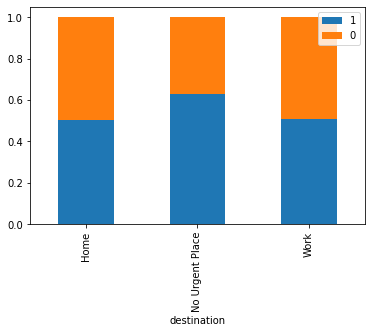

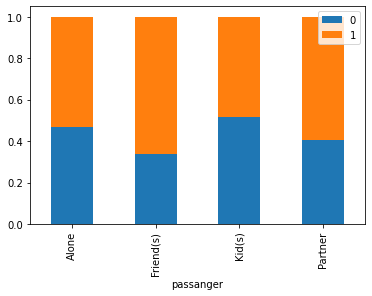

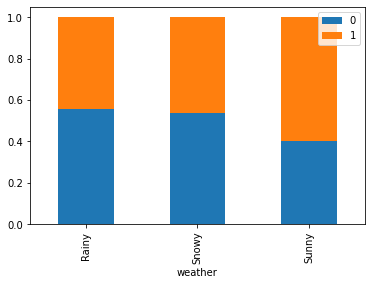

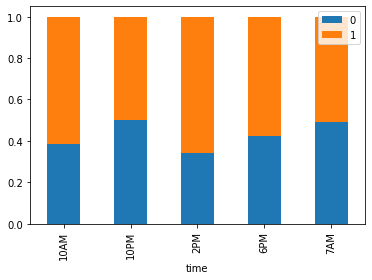

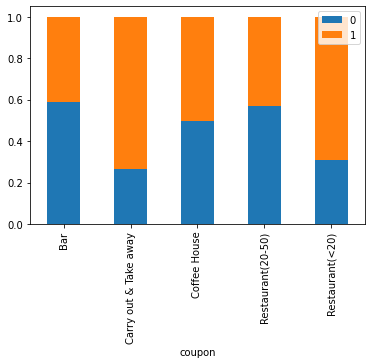

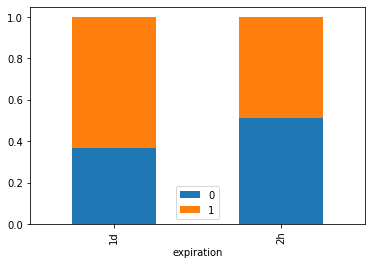

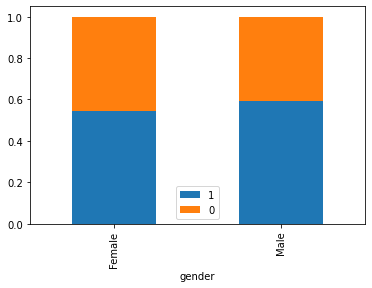

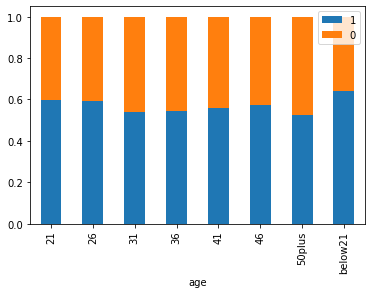

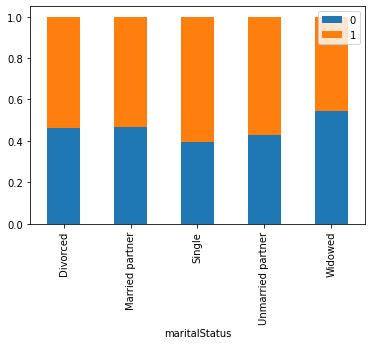

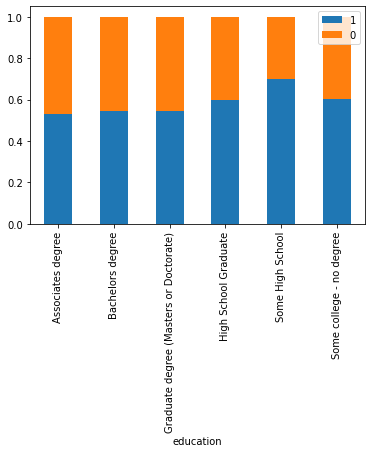

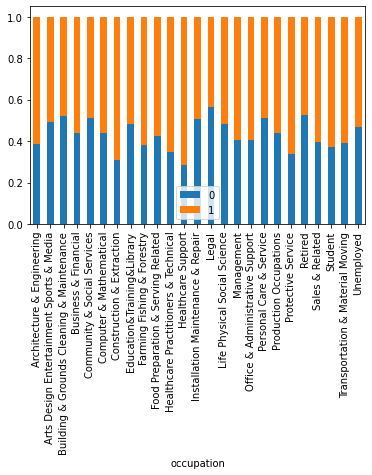

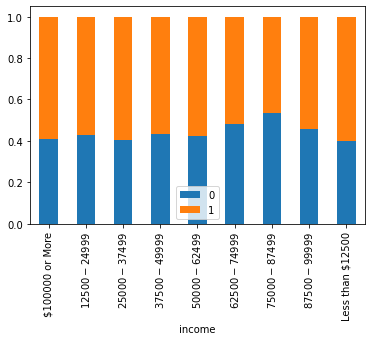

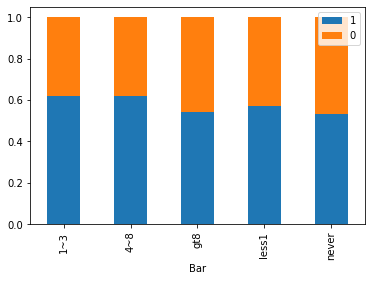

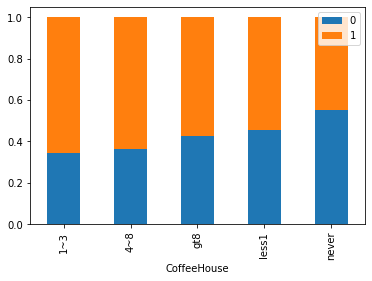

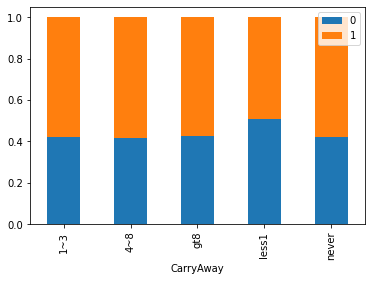

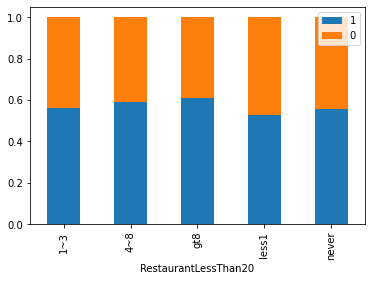

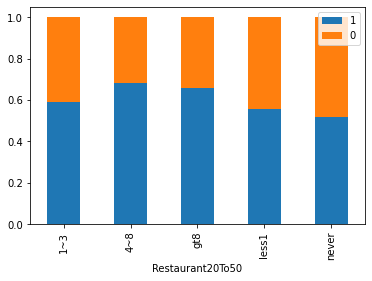

In [41]:
feature_engg_2_stackedgraph(train_df, categorical_list)

In [42]:
#Separate categorical and Numerical data 
# Plotting Stacked bar charts for columns with categorical data with values as percentage of each category in that column

# categorical_data = train_df.select_dtypes(exclude=[np.number])
# cat_list = list(categorical_data.columns)
# numeric_data = train_df.select_dtypes(include=[np.number])
# num_list = list(numeric_data.columns)

# for i in cat_list:
#     train_df.groupby([i])['Y'].apply(lambda x: x.value_counts() / len(x)).transpose().unstack().plot(kind='bar',stacked = True)


In [43]:
# print(cat_list)

### Clubbing Classes and converting them into Ordinal Features

In [44]:
def feature_engg_3(df, col_name, val_2_rep_list, rep_val):
    df[col_name] = df[col_name].replace(val_2_rep_list, rep_val)
    return df

In [45]:
train_df = feature_engg_3(train_df, 'RestaurantLessThan20', ['1~3','4~8'], '1~8')
train_df['RestaurantLessThan20'].value_counts()

1~8      4463
less1    1018
gt8       621
never     113
Name: RestaurantLessThan20, dtype: int64

In [46]:
## Using Stacked bar charts, categories with approx equal percentage are clubbed.
# train_df['RestaurantLessThan20'] = train_df['RestaurantLessThan20'].replace(['1~3','4~8'],'1~8')
# train_df['RestaurantLessThan20'].value_counts()

In [48]:
validation_df = feature_engg_3(validation_df, 'RestaurantLessThan20', ['1~3','4~8'], '1~8')
test_df = feature_engg_3(test_df, 'RestaurantLessThan20', ['1~3','4~8'], '1~8')
print("Value count for each category in this feature for validation_df:\n", validation_df['RestaurantLessThan20'].value_counts())
print("Value count for each category in this feature for test_df:\n", test_df['RestaurantLessThan20'].value_counts())

Value count for each category in this feature for validation_df:
 1~8      1920
less1     456
gt8       246
never      42
Name: RestaurantLessThan20, dtype: int64
Value count for each category in this feature for test_df:
 1~8      2703
less1     619
gt8       418
never      65
Name: RestaurantLessThan20, dtype: int64


In [49]:
# validation_df['RestaurantLessThan20'] = validation_df['RestaurantLessThan20'].replace(['1~3','4~8'],'1~8')

In [50]:
# test_df['RestaurantLessThan20'] = test_df['RestaurantLessThan20'].replace(['1~3','4~8'],'1~8')

In [51]:
train_df = feature_engg_3(train_df, 'CarryAway', ['1~3','4~8', 'gt8'], '1~8ngt8')
train_df = feature_engg_3(train_df, 'CarryAway', ['less1','never'], 'less1_never')
train_df['CarryAway'].value_counts()

1~8ngt8        5272
less1_never     943
Name: CarryAway, dtype: int64

In [53]:
validation_df = feature_engg_3(validation_df, 'CarryAway', ['1~3','4~8', 'gt8'], '1~8ngt8')
validation_df = feature_engg_3(validation_df, 'CarryAway', ['less1','never'], 'less1_never')
print("Value count for each category in this feature for validation_df:\n", validation_df['CarryAway'].value_counts())

Value count for each category in this feature for validation_df:
 1~8ngt8        2218
less1_never     446
Name: CarryAway, dtype: int64


In [55]:
test_df = feature_engg_3(test_df, 'CarryAway', ['1~3','4~8', 'gt8'], '1~8ngt8')
test_df = feature_engg_3(test_df, 'CarryAway', ['less1','never'], 'less1_never')
print("Value count for each category in this feature for test_df:\n", test_df['CarryAway'].value_counts())

Value count for each category in this feature for test_df:
 1~8ngt8        3185
less1_never     620
Name: CarryAway, dtype: int64


In [52]:
# train_df['CarryAway'] = train_df['CarryAway'].replace(['1~3','4~8', 'gt8'],'1~8ngt8')
# train_df['CarryAway'] = train_df['CarryAway'].replace(['less1','never'],'less1_never')
# train_df['CarryAway'].value_counts()

In [54]:
# validation_df['CarryAway'] = validation_df['CarryAway'].replace(['1~3','4~8', 'gt8'],'1~8ngt8')
# validation_df['CarryAway'] = validation_df['CarryAway'].replace(['less1','never'],'less1_never')

In [56]:
# test_df['CarryAway'] = test_df['CarryAway'].replace(['1~3','4~8', 'gt8'],'1~8ngt8')
# test_df['CarryAway'] = test_df['CarryAway'].replace(['less1','never'],'less1_never')

In [58]:
train_df = feature_engg_3(train_df, 'CoffeeHouse', ['1~3','4~8', 'gt8'], '1~8ngt8')
train_df['CoffeeHouse'].value_counts()

1~8ngt8    3011
less1      1780
never      1424
Name: CoffeeHouse, dtype: int64

In [59]:
# train_df['CoffeeHouse'] = train_df['CoffeeHouse'].replace(['1~3','4~8', 'gt8'],'1~8ngt8')
# train_df['CoffeeHouse'].value_counts()

In [60]:
validation_df = feature_engg_3(validation_df, 'CoffeeHouse', ['1~3','4~8', 'gt8'], '1~8ngt8')
validation_df['CoffeeHouse'].value_counts()

1~8ngt8    1275
less1       747
never       642
Name: CoffeeHouse, dtype: int64

In [61]:
# validation_df['CoffeeHouse'] = validation_df['CoffeeHouse'].replace(['1~3','4~8', 'gt8'],'1~8ngt8')

In [62]:
test_df = feature_engg_3(test_df, 'CoffeeHouse', ['1~3','4~8', 'gt8'], '1~8ngt8')
test_df['CoffeeHouse'].value_counts()

1~8ngt8    1834
less1      1075
never       896
Name: CoffeeHouse, dtype: int64

In [63]:
# test_df['CoffeeHouse'] = test_df['CoffeeHouse'].replace(['1~3','4~8', 'gt8'],'1~8ngt8')

In [64]:
train_df = feature_engg_3(train_df, 'Bar', ['1~3','4~8'], '1~8')
train_df['Bar'].value_counts()

never    2580
1~8      1729
less1    1720
gt8       186
Name: Bar, dtype: int64

In [66]:
validation_df = feature_engg_3(validation_df, 'Bar', ['1~3','4~8'], '1~8')
validation_df['Bar'].value_counts()

never    1108
less1     760
1~8       741
gt8        55
Name: Bar, dtype: int64

In [65]:
# train_df['Bar'] = train_df['Bar'].replace(['1~3','4~8'],'1~8')
# train_df['Bar'].value_counts()

In [167]:
# validation_df['Bar'] = validation_df['Bar'].replace(['1~3','4~8'],'1~8')

In [67]:
test_df = feature_engg_3(test_df, 'Bar', ['1~3','4~8'], '1~8')
test_df['Bar'].value_counts()

never    1616
1~8      1079
less1    1002
gt8       108
Name: Bar, dtype: int64

In [68]:
# test_df['Bar'] = test_df['Bar'].replace(['1~3','4~8'],'1~8')

In [69]:
train_df = feature_engg_3(train_df, 'income', ['$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499'], '$12500-$62499')
train_df = feature_engg_3(train_df, 'income', ['$75000 - $87499','$87500 - $99999','$62500 - $74999'], '$62499-$99999')
train_df['income'].value_counts()

$12500-$62499       3595
$62499-$99999       1271
$100000 or More      846
Less than $12500     503
Name: income, dtype: int64

In [70]:
# train_df['income'] = train_df['income'].replace(['$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499'],'$12500-$62499')
# train_df['income'] = train_df['income'].replace(['$75000 - $87499','$87500 - $99999','$62500 - $74999'],'$62499-$99999')
# train_df['income'].value_counts()


In [71]:
validation_df = feature_engg_3(validation_df, 'income', ['$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499'], '$12500-$62499')
validation_df = feature_engg_3(validation_df, 'income', ['$75000 - $87499','$87500 - $99999','$62500 - $74999'], '$62499-$99999')
validation_df['income'].value_counts()

$12500-$62499       1543
$62499-$99999        544
$100000 or More      360
Less than $12500     217
Name: income, dtype: int64

In [72]:
# validation_df['income'] = validation_df['income'].replace(['$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499'],'$12500-$62499')
# validation_df['income'] = validation_df['income'].replace(['$75000 - $87499','$87500 - $99999','$62500 - $74999'],'$62499-$99999')

In [73]:
test_df = feature_engg_3(test_df, 'income', ['$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499'], '$12500-$62499')
test_df = feature_engg_3(test_df, 'income', ['$75000 - $87499','$87500 - $99999','$62500 - $74999'], '$62499-$99999')
test_df['income'].value_counts()

$12500-$62499       2170
$62499-$99999        783
$100000 or More      530
Less than $12500     322
Name: income, dtype: int64

In [74]:
# test_df['income'] = test_df['income'].replace(['$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499'],'$12500-$62499')
# test_df['income'] = test_df['income'].replace(['$75000 - $87499','$87500 - $99999','$62500 - $74999'],'$62499-$99999')

In [76]:
l = ['Architecture & Engineering', 'Construction & Extraction','Healthcare Support','Food Preparation & Serving Related','Healthcare Practitioners & Technical', 'Farming Fishing & Forestry']
train_df = feature_engg_3(train_df, 'occupation', l, 'Arch_cons_Health_Food_Farm')
train_df = feature_engg_3(train_df, 'occupation', ['Business & Financial', 'Education&Training&Library', 'Retired'], 'Buss_Edu_Retired')
train_df = feature_engg_3(train_df, 'occupation', ['Arts Design Entertainment Sports & Media', 'Community & Social Services', 'Building & Grounds Cleaning & Maintenance'],'Arts_Comm_Building')
train_df = feature_engg_3(train_df, 'occupation', ['Computer & Mathematical', 'Installation Maintenance & Repair', 'Personal Care & Service', 'Sales & Related', 'Unemployed'],'comp_Inst_Pers_Sales_Unemployed')
train_df = feature_engg_3(train_df, 'occupation', ['Student', 'Management', 'Office & Administrative Support', 'Transportation & Material Moving', 'Protective Service','Life Physical Social Science', 'Production Occupations'],'Stud_manage_off_Trans_Protect_Life_Prod')
train_df = feature_engg_3(train_df, 'occupation', ['Arts_Comm_Building','Buss_Edu_Retired'],'Arts_Comm_Building_Buss_Edu_Retired')
train_df['occupation'].value_counts()

comp_Inst_Pers_Sales_Unemployed            2301
Stud_manage_off_Trans_Protect_Life_Prod    1824
Arts_Comm_Building_Buss_Edu_Retired        1404
Arch_cons_Health_Food_Farm                  592
Legal                                        94
Name: occupation, dtype: int64

In [75]:
# l = ['Architecture & Engineering', 'Construction & Extraction','Healthcare Support','Food Preparation & Serving Related','Healthcare Practitioners & Technical', 'Farming Fishing & Forestry']
# train_df['occupation'] = train_df['occupation'].replace(l,'Arch_cons_Health_Food_Farm')
# train_df['occupation'] = train_df['occupation'].replace(['Business & Financial', 'Education&Training&Library', 'Retired'],'Buss_Edu_Retired')
# train_df['occupation'] = train_df['occupation'].replace(['Arts Design Entertainment Sports & Media', 'Community & Social Services', 'Building & Grounds Cleaning & Maintenance'],'Arts_Comm_Building')
# train_df['occupation'] = train_df['occupation'].replace(['Computer & Mathematical', 'Installation Maintenance & Repair', 'Personal Care & Service', 'Sales & Related', 'Unemployed'],'comp_Inst_Pers_Sales_Unemployed')
# train_df['occupation'] = train_df['occupation'].replace(['Student', 'Management', 'Office & Administrative Support', 'Transportation & Material Moving', 'Protective Service','Life Physical Social Science', 'Production Occupations'],'Stud_manage_off_Trans_Protect_Life_Prod')
# train_df['occupation'] = train_df['occupation'].replace(['Arts_Comm_Building','Buss_Edu_Retired'],'Arts_Comm_Building_Buss_Edu_Retired')
# train_df['occupation'].value_counts()

In [77]:
l = ['Architecture & Engineering', 'Construction & Extraction','Healthcare Support','Food Preparation & Serving Related','Healthcare Practitioners & Technical', 'Farming Fishing & Forestry']
validation_df = feature_engg_3(validation_df, 'occupation', l, 'Arch_cons_Health_Food_Farm')
validation_df = feature_engg_3(validation_df, 'occupation', ['Business & Financial', 'Education&Training&Library', 'Retired'], 'Buss_Edu_Retired')
validation_df = feature_engg_3(validation_df, 'occupation', ['Arts Design Entertainment Sports & Media', 'Community & Social Services', 'Building & Grounds Cleaning & Maintenance'],'Arts_Comm_Building')
validation_df = feature_engg_3(validation_df, 'occupation', ['Computer & Mathematical', 'Installation Maintenance & Repair', 'Personal Care & Service', 'Sales & Related', 'Unemployed'],'comp_Inst_Pers_Sales_Unemployed')
validation_df = feature_engg_3(validation_df, 'occupation', ['Student', 'Management', 'Office & Administrative Support', 'Transportation & Material Moving', 'Protective Service','Life Physical Social Science', 'Production Occupations'],'Stud_manage_off_Trans_Protect_Life_Prod')
validation_df = feature_engg_3(validation_df, 'occupation', ['Arts_Comm_Building','Buss_Edu_Retired'],'Arts_Comm_Building_Buss_Edu_Retired')
validation_df['occupation'].value_counts()

comp_Inst_Pers_Sales_Unemployed            957
Stud_manage_off_Trans_Protect_Life_Prod    801
Arts_Comm_Building_Buss_Edu_Retired        622
Arch_cons_Health_Food_Farm                 236
Legal                                       48
Name: occupation, dtype: int64

In [78]:
# l = ['Architecture & Engineering', 'Construction & Extraction','Healthcare Support','Food Preparation & Serving Related','Healthcare Practitioners & Technical', 'Farming Fishing & Forestry']
# validation_df['occupation'] = validation_df['occupation'].replace(l,'Arch_cons_Health_Food_Farm')
# validation_df['occupation'] = validation_df['occupation'].replace(['Business & Financial', 'Education&Training&Library', 'Retired'],'Buss_Edu_Retired')
# validation_df['occupation'] = validation_df['occupation'].replace(['Arts Design Entertainment Sports & Media', 'Community & Social Services', 'Building & Grounds Cleaning & Maintenance'],'Arts_Comm_Building')
# validation_df['occupation'] = validation_df['occupation'].replace(['Computer & Mathematical', 'Installation Maintenance & Repair', 'Personal Care & Service', 'Sales & Related', 'Unemployed'],'comp_Inst_Pers_Sales_Unemployed')
# validation_df['occupation'] = validation_df['occupation'].replace(['Student', 'Management', 'Office & Administrative Support', 'Transportation & Material Moving', 'Protective Service','Life Physical Social Science', 'Production Occupations'],'Stud_manage_off_Trans_Protect_Life_Prod')
# validation_df['occupation'] = validation_df['occupation'].replace(['Arts_Comm_Building','Buss_Edu_Retired'],'Arts_Comm_Building_Buss_Edu_Retired')

In [79]:
l = ['Architecture & Engineering', 'Construction & Extraction','Healthcare Support','Food Preparation & Serving Related','Healthcare Practitioners & Technical', 'Farming Fishing & Forestry']
test_df = feature_engg_3(test_df, 'occupation', l, 'Arch_cons_Health_Food_Farm')
test_df = feature_engg_3(test_df, 'occupation', ['Business & Financial', 'Education&Training&Library', 'Retired'], 'Buss_Edu_Retired')
test_df = feature_engg_3(test_df, 'occupation', ['Arts Design Entertainment Sports & Media', 'Community & Social Services', 'Building & Grounds Cleaning & Maintenance'],'Arts_Comm_Building')
test_df = feature_engg_3(test_df, 'occupation', ['Computer & Mathematical', 'Installation Maintenance & Repair', 'Personal Care & Service', 'Sales & Related', 'Unemployed'],'comp_Inst_Pers_Sales_Unemployed')
test_df = feature_engg_3(test_df, 'occupation', ['Student', 'Management', 'Office & Administrative Support', 'Transportation & Material Moving', 'Protective Service','Life Physical Social Science', 'Production Occupations'],'Stud_manage_off_Trans_Protect_Life_Prod')
test_df = feature_engg_3(test_df, 'occupation', ['Arts_Comm_Building','Buss_Edu_Retired'],'Arts_Comm_Building_Buss_Edu_Retired')
test_df['occupation'].value_counts()

comp_Inst_Pers_Sales_Unemployed            1421
Stud_manage_off_Trans_Protect_Life_Prod    1109
Arts_Comm_Building_Buss_Edu_Retired         870
Arch_cons_Health_Food_Farm                  328
Legal                                        77
Name: occupation, dtype: int64

In [80]:
# l = ['Architecture & Engineering', 'Construction & Extraction','Healthcare Support','Food Preparation & Serving Related','Healthcare Practitioners & Technical', 'Farming Fishing & Forestry']
# test_df['occupation'] = test_df['occupation'].replace(l,'Arch_cons_Health_Food_Farm')
# test_df['occupation'] = test_df['occupation'].replace(['Business & Financial', 'Education&Training&Library', 'Retired'],'Buss_Edu_Retired')
# test_df['occupation'] = test_df['occupation'].replace(['Arts Design Entertainment Sports & Media', 'Community & Social Services', 'Building & Grounds Cleaning & Maintenance'],'Arts_Comm_Building')
# test_df['occupation'] = test_df['occupation'].replace(['Computer & Mathematical', 'Installation Maintenance & Repair', 'Personal Care & Service', 'Sales & Related', 'Unemployed'],'comp_Inst_Pers_Sales_Unemployed')
# test_df['occupation'] = test_df['occupation'].replace(['Student', 'Management', 'Office & Administrative Support', 'Transportation & Material Moving', 'Protective Service','Life Physical Social Science', 'Production Occupations'],'Stud_manage_off_Trans_Protect_Life_Prod')
# test_df['occupation'] = test_df['occupation'].replace(['Arts_Comm_Building','Buss_Edu_Retired'],'Arts_Comm_Building_Buss_Edu_Retired')

In [81]:
train_df = feature_engg_3(train_df, 'education', ['Bachelors degree','Associates degree', 'Graduate degree (Masters or Doctorate)'],'Bach_Mast_Asso')
train_df = feature_engg_3(train_df, 'education', ['Some college - no degree','High School Graduate'],'Nodeg_HSGrad')
train_df['education'].value_counts()

Bach_Mast_Asso      3595
Nodeg_HSGrad        2580
Some High School      40
Name: education, dtype: int64

In [82]:
# train_df['education'] = train_df['education'].replace(['Bachelors degree','Associates degree', 'Graduate degree (Masters or Doctorate)'],'Bach_Mast_Asso')
# train_df['education'] = train_df['education'].replace(['Some college - no degree','High School Graduate'],'Nodeg_HSGrad')
# train_df['education'].value_counts()

In [83]:
validation_df = feature_engg_3(validation_df, 'education', ['Bachelors degree','Associates degree', 'Graduate degree (Masters or Doctorate)'],'Bach_Mast_Asso')
validation_df = feature_engg_3(validation_df, 'education', ['Some college - no degree','High School Graduate'],'Nodeg_HSGrad')
validation_df['education'].value_counts()

Bach_Mast_Asso      1525
Nodeg_HSGrad        1121
Some High School      18
Name: education, dtype: int64

In [84]:
# validation_df['education'] = validation_df['education'].replace(['Bachelors degree','Associates degree', 'Graduate degree (Masters or Doctorate)'],'Bach_Mast_Asso')
# validation_df['education'] = validation_df['education'].replace(['Some college - no degree','High School Graduate'],'Nodeg_HSGrad')

In [85]:
test_df = feature_engg_3(test_df, 'education', ['Bachelors degree','Associates degree', 'Graduate degree (Masters or Doctorate)'],'Bach_Mast_Asso')
test_df = feature_engg_3(test_df, 'education', ['Some college - no degree','High School Graduate'],'Nodeg_HSGrad')
test_df['education'].value_counts()

Bach_Mast_Asso      2220
Nodeg_HSGrad        1555
Some High School      30
Name: education, dtype: int64

In [86]:
# test_df['education'] = test_df['education'].replace(['Bachelors degree','Associates degree', 'Graduate degree (Masters or Doctorate)'],'Bach_Mast_Asso')
# test_df['education'] = test_df['education'].replace(['Some college - no degree','High School Graduate'],'Nodeg_HSGrad')

In [87]:
train_df = feature_engg_3(train_df, 'maritalStatus', ['Married partner', 'Divorced', 'Widowed'],'Married_Divorced_Widowed')
train_df = feature_engg_3(train_df, 'maritalStatus', ['Single', 'Unmarried partner'],'Single_Unmarriedpartner')
train_df['maritalStatus'].value_counts()

Single_Unmarriedpartner     3434
Married_Divorced_Widowed    2781
Name: maritalStatus, dtype: int64

In [88]:
# train_df['maritalStatus'] = train_df['maritalStatus'].replace(['Married partner', 'Divorced', 'Widowed'],'Married_Divorced_Widowed')
# train_df['maritalStatus'] = train_df['maritalStatus'].replace(['Single', 'Unmarried partner'],'Single_Unmarriedpartner')
# train_df['maritalStatus'].value_counts()

In [89]:
validation_df = feature_engg_3(validation_df, 'maritalStatus', ['Married partner', 'Divorced', 'Widowed'],'Married_Divorced_Widowed')
validation_df = feature_engg_3(validation_df, 'maritalStatus', ['Single', 'Unmarried partner'],'Single_Unmarriedpartner')
validation_df['maritalStatus'].value_counts()

Single_Unmarriedpartner     1428
Married_Divorced_Widowed    1236
Name: maritalStatus, dtype: int64

In [90]:
# validation_df['maritalStatus'] = validation_df['maritalStatus'].replace(['Married partner', 'Divorced', 'Widowed'],'Married_Divorced_Widowed')
# validation_df['maritalStatus'] = validation_df['maritalStatus'].replace(['Single', 'Unmarried partner'],'Single_Unmarriedpartner')


In [91]:
test_df = feature_engg_3(test_df, 'maritalStatus', ['Married partner', 'Divorced', 'Widowed'],'Married_Divorced_Widowed')
test_df = feature_engg_3(test_df, 'maritalStatus', ['Single', 'Unmarried partner'],'Single_Unmarriedpartner')
test_df['maritalStatus'].value_counts()

Single_Unmarriedpartner     2076
Married_Divorced_Widowed    1729
Name: maritalStatus, dtype: int64

In [92]:
# test_df['maritalStatus'] = test_df['maritalStatus'].replace(['Married partner', 'Divorced', 'Widowed'],'Married_Divorced_Widowed')
# test_df['maritalStatus'] = test_df['maritalStatus'].replace(['Single', 'Unmarried partner'],'Single_Unmarriedpartner')

In [93]:
train_df = feature_engg_3(train_df, 'age', ['26','21', 'below21'],'below26')
train_df = feature_engg_3(train_df, 'age', ['31','50plus', '36','41', '46'],'above26')
train_df['age'].value_counts()

above26    3414
below26    2801
Name: age, dtype: int64

In [94]:
# train_df['age'] = train_df['age'].replace(['26','21', 'below21'],'below26')
# train_df['age'] = train_df['age'].replace(['31','50plus', '36','41', '46'],'above26')
# train_df['age'].value_counts()

In [95]:
validation_df = feature_engg_3(validation_df, 'age', ['26','21', 'below21'],'below26')
validation_df = feature_engg_3(validation_df, 'age', ['31','50plus', '36','41', '46'],'above26')
validation_df['age'].value_counts()

above26    1485
below26    1179
Name: age, dtype: int64

In [96]:
# validation_df['age'] = validation_df['age'].replace(['26','21', 'below21'],'below26')
# validation_df['age'] = validation_df['age'].replace(['31','50plus', '36','41', '46'],'above26')

In [97]:
test_df = feature_engg_3(test_df, 'age', ['26','21', 'below21'],'below26')
test_df = feature_engg_3(test_df, 'age', ['31','50plus', '36','41', '46'],'above26')
test_df['age'].value_counts()

above26    2026
below26    1779
Name: age, dtype: int64

In [98]:
# test_df['age'] = test_df['age'].replace(['26','21', 'below21'],'below26')
# test_df['age'] = test_df['age'].replace(['31','50plus', '36','41', '46'],'above26')

In [99]:
train_df = feature_engg_3(train_df, 'coupon', ['Restaurant(20-50)','Bar'],'Rest(20-50)_n_Bar')
train_df = feature_engg_3(train_df, 'coupon', ['Restaurant(<20)','Coffee House','Carry out & Take away'],'Rest(<20)_CH_CT')
train_df['coupon'].value_counts()

Rest(<20)_CH_CT      4543
Rest(20-50)_n_Bar    1672
Name: coupon, dtype: int64

In [100]:
# train_df['coupon'] = train_df['coupon'].replace(['Restaurant(20-50)','Bar'],'Rest(20-50)_n_Bar')
# train_df['coupon'] = train_df['coupon'].replace(['Restaurant(<20)','Coffee House','Carry out & Take away'],'Rest(<20)_CH_CT')
# train_df['coupon'].value_counts()

In [101]:
validation_df = feature_engg_3(validation_df, 'coupon', ['Restaurant(20-50)','Bar'],'Rest(20-50)_n_Bar')
validation_df = feature_engg_3(validation_df, 'coupon', ['Restaurant(<20)','Coffee House','Carry out & Take away'],'Rest(<20)_CH_CT')
validation_df['coupon'].value_counts()

Rest(<20)_CH_CT      1903
Rest(20-50)_n_Bar     761
Name: coupon, dtype: int64

In [102]:
# validation_df['coupon'] = validation_df['coupon'].replace(['Restaurant(20-50)','Bar'],'Rest(20-50)_n_Bar')
# validation_df['coupon'] = validation_df['coupon'].replace(['Restaurant(<20)','Coffee House','Carry out & Take away'],'Rest(<20)_CH_CT')

In [103]:
test_df = feature_engg_3(test_df, 'coupon', ['Restaurant(20-50)','Bar'],'Rest(20-50)_n_Bar')
test_df = feature_engg_3(test_df, 'coupon', ['Restaurant(<20)','Coffee House','Carry out & Take away'],'Rest(<20)_CH_CT')
test_df['coupon'].value_counts()

Rest(<20)_CH_CT      2729
Rest(20-50)_n_Bar    1076
Name: coupon, dtype: int64

In [104]:
# test_df['coupon'] = test_df['coupon'].replace(['Restaurant(20-50)','Bar'],'Rest(20-50)_n_Bar')
# test_df['coupon'] = test_df['coupon'].replace(['Restaurant(<20)','Coffee House','Carry out & Take away'],'Rest(<20)_CH_CT')

In [105]:
train_df = feature_engg_3(train_df, 'destination', ['Home','Work'],'Home_n_Work')
train_df['destination'].value_counts()

Home_n_Work        3127
No Urgent Place    3088
Name: destination, dtype: int64

In [106]:
# train_df['destination'] = train_df['destination'].replace(['Home','Work'],'Home_n_Work')
# train_df['destination'].value_counts()


In [107]:
validation_df = feature_engg_3(validation_df, 'destination', ['Home','Work'],'Home_n_Work')
validation_df['destination'].value_counts()

Home_n_Work        1378
No Urgent Place    1286
Name: destination, dtype: int64

In [108]:
# validation_df['destination'] = validation_df['destination'].replace(['Home','Work'],'Home_n_Work')

In [109]:
test_df = feature_engg_3(test_df, 'destination', ['Home','Work'],'Home_n_Work')
test_df['destination'].value_counts()

No Urgent Place    1909
Home_n_Work        1896
Name: destination, dtype: int64

In [110]:
# test_df['destination'] = test_df['destination'].replace(['Home','Work'],'Home_n_Work')

In [111]:
train_df = feature_engg_3(train_df, 'passanger', ['Alone','Kid(s)'],'Alone_n_Kids')
train_df['passanger'].value_counts()

Alone_n_Kids    4034
Friend(s)       1641
Partner          540
Name: passanger, dtype: int64

In [112]:
# train_df['passanger'] = train_df['passanger'].replace(['Alone','Kid(s)'],'Alone_n_Kids')
# train_df['passanger'].value_counts()

In [113]:
validation_df = feature_engg_3(validation_df, 'passanger', ['Alone','Kid(s)'],'Alone_n_Kids')
validation_df['passanger'].value_counts()

Alone_n_Kids    1814
Friend(s)        623
Partner          227
Name: passanger, dtype: int64

In [114]:
# validation_df['passanger'] = validation_df['passanger'].replace(['Alone','Kid(s)'],'Alone_n_Kids')

In [115]:
test_df = feature_engg_3(test_df, 'passanger', ['Alone','Kid(s)'],'Alone_n_Kids')
test_df['passanger'].value_counts()

Alone_n_Kids    2463
Friend(s)       1034
Partner          308
Name: passanger, dtype: int64

In [116]:
# test_df['passanger'] = test_df['passanger'].replace(['Alone','Kid(s)'],'Alone_n_Kids')

In [117]:
train_df = feature_engg_3(train_df, 'weather', ['Snowy','Rainy'],'Snowy_n_Rainy')
train_df['weather'].value_counts()

Sunny            4967
Snowy_n_Rainy    1248
Name: weather, dtype: int64

In [118]:
# train_df['weather'] = train_df['weather'].replace(['Snowy','Rainy'],'Snowy_n_Rainy')
# train_df['weather'].value_counts()

In [119]:
validation_df = feature_engg_3(validation_df, 'weather', ['Snowy','Rainy'],'Snowy_n_Rainy')
validation_df['weather'].value_counts()

Sunny            2063
Snowy_n_Rainy     601
Name: weather, dtype: int64

In [120]:
# validation_df['weather'] = validation_df['weather'].replace(['Snowy','Rainy'],'Snowy_n_Rainy')

In [121]:
test_df = feature_engg_3(test_df, 'weather', ['Snowy','Rainy'],'Snowy_n_Rainy')
test_df['weather'].value_counts()

Sunny            3039
Snowy_n_Rainy     766
Name: weather, dtype: int64

In [122]:
# test_df['weather'] = test_df['weather'].replace(['Snowy','Rainy'],'Snowy_n_Rainy')

In [123]:
train_df = feature_engg_3(train_df, 'time', ['7AM','10PM'],'7AM_n_10PM')
train_df = feature_engg_3(train_df, 'time', ['6PM','10AM', '2PM'],'6PM_10AM_2PM')
train_df['time'].value_counts()

6PM_10AM_2PM    3687
7AM_n_10PM      2528
Name: time, dtype: int64

In [124]:
# train_df['time'] = train_df['time'].replace(['7AM','10PM'],'7AM_n_10PM')
# train_df['time'] = train_df['time'].replace(['6PM','10AM', '2PM'],'6PM_10AM_2PM')
# train_df['time'].value_counts()

In [125]:
validation_df = feature_engg_3(validation_df, 'time', ['7AM','10PM'],'7AM_n_10PM')
validation_df = feature_engg_3(validation_df, 'time', ['6PM','10AM', '2PM'],'6PM_10AM_2PM')
validation_df['time'].value_counts()

6PM_10AM_2PM    1539
7AM_n_10PM      1125
Name: time, dtype: int64

In [126]:
# validation_df['time'] = validation_df['time'].replace(['7AM','10PM'],'7AM_n_10PM')
# validation_df['time'] = validation_df['time'].replace(['6PM','10AM', '2PM'],'6PM_10AM_2PM')

In [127]:
test_df = feature_engg_3(test_df, 'time', ['7AM','10PM'],'7AM_n_10PM')
test_df = feature_engg_3(test_df, 'time', ['6PM','10AM', '2PM'],'6PM_10AM_2PM')
test_df['time'].value_counts()

6PM_10AM_2PM    2288
7AM_n_10PM      1517
Name: time, dtype: int64

In [128]:
# test_df['time'] = test_df['time'].replace(['7AM','10PM'],'7AM_n_10PM')
# test_df['time'] = test_df['time'].replace(['6PM','10AM', '2PM'],'6PM_10AM_2PM')

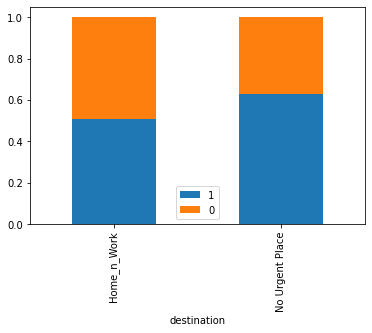

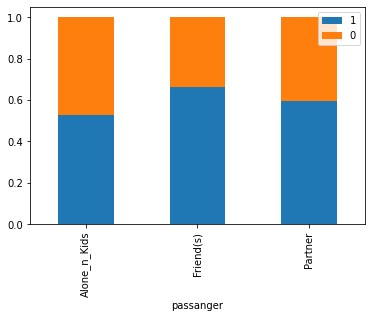

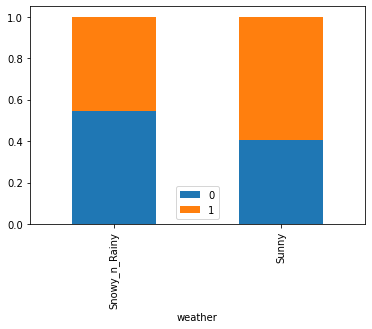

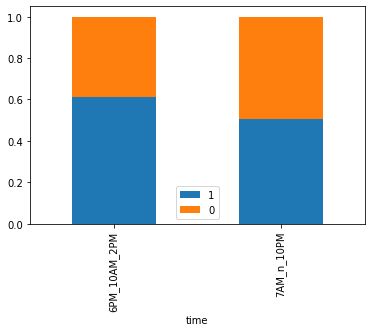

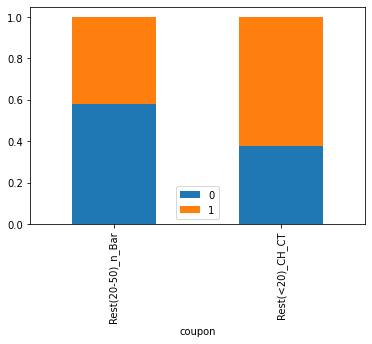

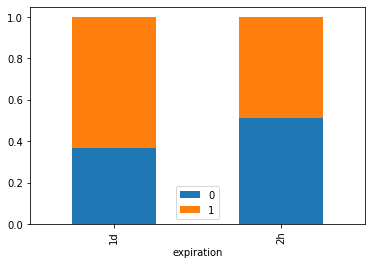

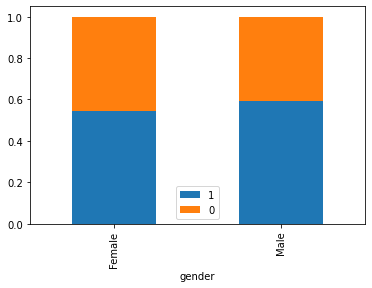

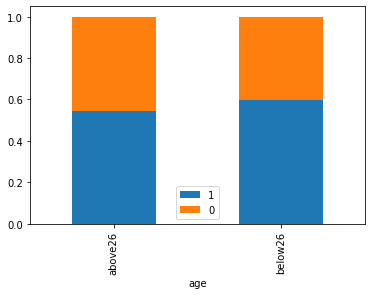

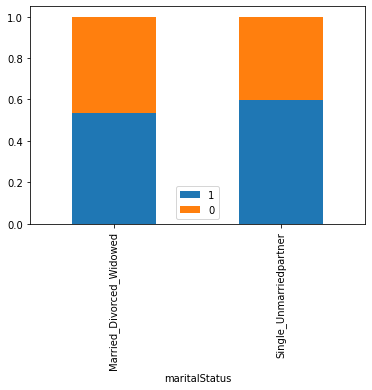

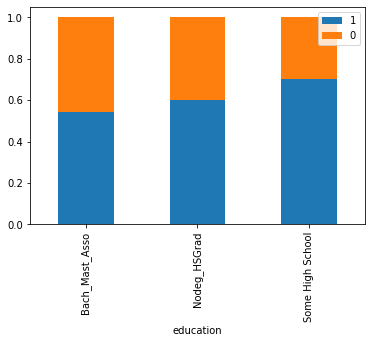

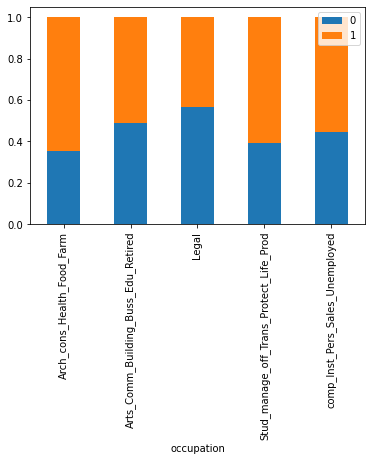

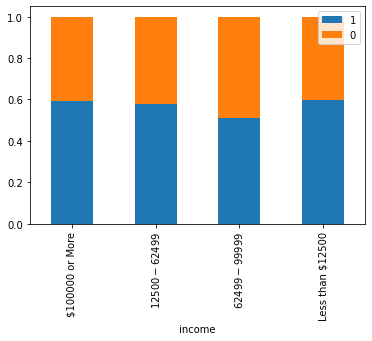

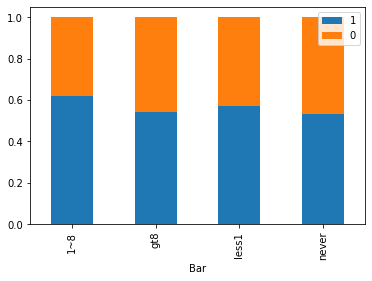

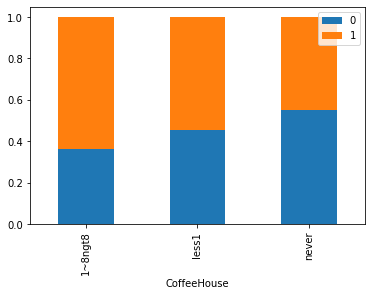

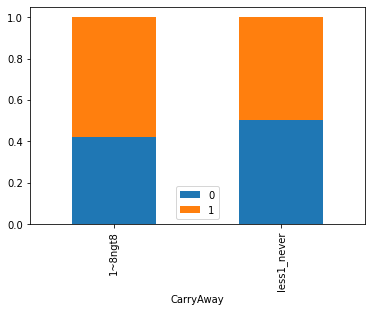

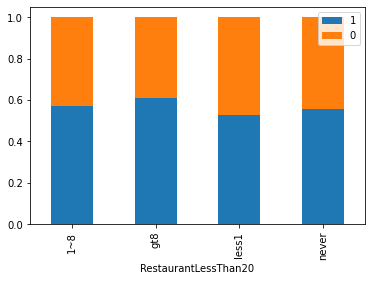

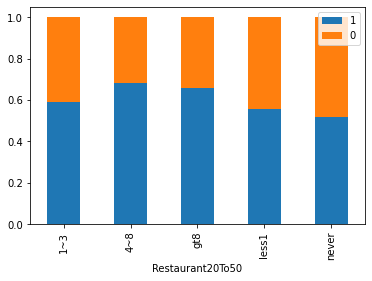

In [130]:
feature_engg_2_stackedgraph(train_df, categorical_list)

In [129]:
# for i in cat_list:
#     train_df.groupby([i])['Y'].apply(lambda x: x.value_counts() / len(x)).transpose().unstack().plot(kind='bar',stacked = True)

In [200]:
#train_df.groupby(['Restaurant20To50'])['Y'].apply(lambda x: x.value_counts() / len(x))

In [201]:
#cat_list

### Encoding for classes to make them ordinal

In [131]:
cleanup_nums = {"destination": {"No Urgent Place": 2,"Home_n_Work": 1 },
                "passanger":   {"Alone_n_Kids": 3, "Partner": 2, "Friend(s)": 1},
                "weather": {"Sunny": 2,"Snowy_n_Rainy": 1},
                "time": {"6PM_10AM_2PM": 2,"7AM_n_10PM": 1},
                "coupon": {"Rest(<20)_CH_CT": 2,"Rest(20-50)_n_Bar": 1},
                "expiration": {"1d": 2,"2h": 1},
                "gender": {"Male": 2,"Female": 1},
                "age": {"below26": 2,"above26": 1},
                "maritalStatus": {"Single_Unmarriedpartner": 2,"Married_Divorced_Widowed": 1},
                "education": {"Some High School": 3,"Nodeg_HSGrad": 2, "Bach_Mast_Asso": 1 },
                "occupation": {"Arch_cons_Health_Food_Farm": 5,"Stud_manage_off_Trans_Protect_Life_Prod": 4,"comp_Inst_Pers_Sales_Unemployed": 3, "Arts_Comm_Building_Buss_Edu_Retired": 2, "Legal": 1 },
                "income": {"Less than $12500": 4,"$12500-$62499": 3,"$100000 or More": 2, "$62499-$99999": 1},
                "car": {"Car that is too old _n_Mazda5": 4,"Scooter and motorcycle": 3, "do not drive": 2, "crossover": 1 },
                "Bar": {"1~8": 4,"less1": 3, "gt8": 2, "never": 1 },
                "CoffeeHouse": {"1~8ngt8": 3, "less1": 2, "never": 1 },
                "CarryAway": {"1~8ngt8": 2, "less1_never": 1 },
                "RestaurantLessThan20": {"gt8": 4,"1~8": 3, "never": 2, "less1": 1 },
                "Restaurant20To50": {"gt8": 5, "4~8": 4,"1~3": 3, "less1": 2, "never": 1 }
                }
train_df = train_df.replace(cleanup_nums)

In [132]:
validation_df = validation_df.replace(cleanup_nums)

In [133]:
test_df = test_df.replace(cleanup_nums)

In [134]:
train_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
596,2,1,2,80,2,2,2,2,2,2,...,1,2,3,2,1,1,0,0,1,1
8371,2,1,2,30,1,2,1,1,1,1,...,3,2,4,2,1,0,0,0,1,1
8752,1,3,1,30,1,1,1,1,1,1,...,3,2,3,2,1,0,0,0,1,0
3908,1,3,2,55,1,2,2,2,1,2,...,1,2,3,3,1,0,0,0,1,1
4506,2,2,2,80,2,2,2,1,1,2,...,3,2,4,3,1,0,0,0,1,1


In [136]:
numeric_list

['temperature',
 'has_children',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Y']

In [137]:
def feature_engg_4_scatterplot(df, num_lst):
    num_list_new = num_lst[0:7]
    for i in num_list_new:
        ax1 =df.plot.scatter(x=i, y='Y',c='DarkBlue')


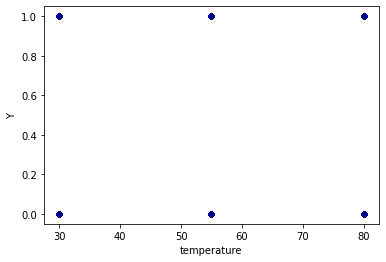

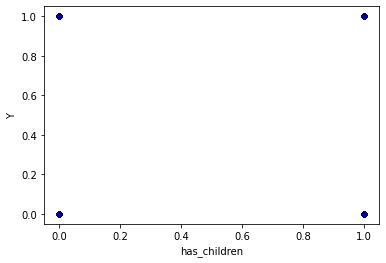

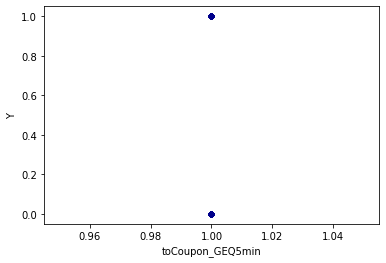

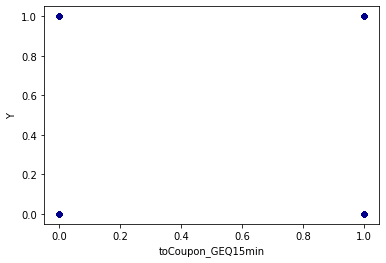

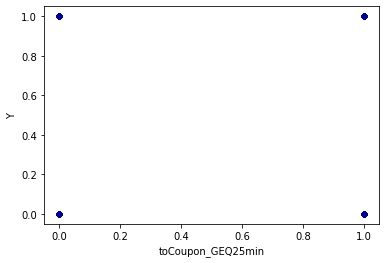

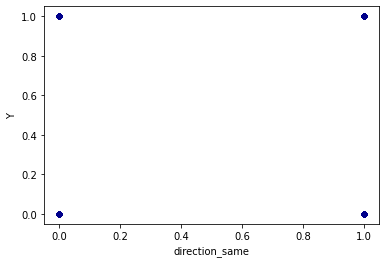

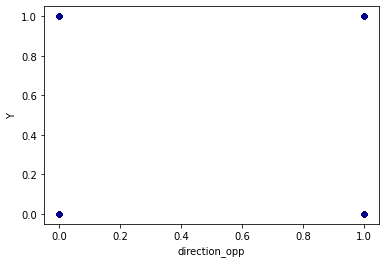

In [138]:
feature_engg_4_scatterplot(train_df, numeric_list)

In [139]:
# num_list_new = num_list[0:7]
# for i in num_list_new:
#     ax1 =train_df.plot.scatter(x=i, y='Y',c='DarkBlue')

#### Feature Selection
##### Spearman correlation

In [140]:
def feature_selection_spearman(df):
    my_r = train_df.corr(method="spearman")['Y']
    return my_r

In [141]:
feature_selection_spearman(train_df)

destination             0.123467
passanger              -0.118682
weather                 0.114672
temperature             0.073637
time                    0.103171
coupon                  0.180265
expiration              0.142984
gender                  0.045318
age                     0.055477
maritalStatus           0.063137
has_children           -0.050987
education               0.063229
occupation              0.088886
income                  0.047791
Bar                     0.070115
CoffeeHouse             0.149051
CarryAway               0.060024
RestaurantLessThan20    0.042821
Restaurant20To50        0.072709
toCoupon_GEQ5min             NaN
toCoupon_GEQ15min      -0.092340
toCoupon_GEQ25min      -0.101272
direction_same          0.019626
direction_opp          -0.019626
Y                       1.000000
Name: Y, dtype: float64

In [142]:
# my_r = train_df.corr(method="spearman")['Y']
# print(my_r)

##### Chi-square Test

In [144]:
from sklearn.feature_selection import chi2
import numpy as np
def feature_selection_chisquare(df):
    for i in df.columns:
        X = np.array(df[i]).reshape(-1,1)
        y = df['Y']
        chi_scores = chi2(X,y)
        #print(chi_scores[0][0])
        print(chi_scores[1][0])

In [145]:
feature_selection_chisquare(train_df)

6.95541139958465e-05
9.88514698468597e-08
0.006935695189425336
1.0909702170469093e-40
0.0015489490729085993
1.6679388721785845e-06
6.8004242255602854e-06
0.14335036390615988
0.07080594436570807
0.04699952166370468
0.002032307273996498
0.03209113806969748
0.00017614700541246066
0.018336346820756567
7.969966420916134e-06
2.2299405110294065e-10
0.21176387984344464
0.08855641554645102
0.0004967687460849889
1.0
1.2276159423831712e-06
6.369139027614382e-14
0.1714621008755111
0.46919853682938417
0.0


In [146]:
# from sklearn.feature_selection import chi2
# import numpy as np
# for i in train_df.columns:
#     X = np.array(train_df[i]).reshape(-1,1)
#     y = train_df['Y']
#     chi_scores = chi2(X,y)
#     #print(chi_scores[0][0])
#     print(chi_scores[1][0])
    
# #for i in chisq:
#     #print(i[0])
    


In [210]:
# for i in num_list:
#     X = np.array(train_df[i]).reshape(-1,1)
#     y = train_df['Y']
#     chi_scores = chi2(X,y)
#     print(i, chi_scores)


In [147]:
train_df['toCoupon_GEQ5min'].dtypes

dtype('int64')

In [148]:
train_df['toCoupon_GEQ5min'].value_counts()

1    6215
Name: toCoupon_GEQ5min, dtype: int64

In [149]:
train_df['toCoupon_GEQ15min'].dtypes

dtype('int64')

In [150]:
train_df['toCoupon_GEQ15min'].value_counts()

1    3455
0    2760
Name: toCoupon_GEQ15min, dtype: int64

In [151]:
train_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
596,2,1,2,80,2,2,2,2,2,2,...,1,2,3,2,1,1,0,0,1,1
8371,2,1,2,30,1,2,1,1,1,1,...,3,2,4,2,1,0,0,0,1,1
8752,1,3,1,30,1,1,1,1,1,1,...,3,2,3,2,1,0,0,0,1,0
3908,1,3,2,55,1,2,2,2,1,2,...,1,2,3,3,1,0,0,0,1,1
4506,2,2,2,80,2,2,2,1,1,2,...,3,2,4,3,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8409,2,3,2,55,2,2,1,2,2,2,...,3,2,3,4,1,0,0,0,1,1
6028,2,1,2,80,2,2,1,1,2,2,...,2,1,3,2,1,1,0,0,1,1
6702,1,3,2,80,1,2,2,2,2,2,...,3,1,3,1,1,0,0,0,1,1
12589,1,3,2,80,1,1,1,2,2,2,...,1,2,3,2,1,0,0,1,0,0


In [152]:
Ytrain = train_df['Y']
Xtrain = train_df.drop(['Y'], axis=1)
print(Xtrain)

       destination  passanger  weather  temperature  time  coupon  expiration  \
596              2          1        2           80     2       2           2   
8371             2          1        2           30     1       2           1   
8752             1          3        1           30     1       1           1   
3908             1          3        2           55     1       2           2   
4506             2          2        2           80     2       2           2   
...            ...        ...      ...          ...   ...     ...         ...   
8409             2          3        2           55     2       2           1   
6028             2          1        2           80     2       2           1   
6702             1          3        2           80     1       2           2   
12589            1          3        2           80     1       1           1   
6948             1          2        2           30     1       2           1   

       gender  age  marital

##### Mutual Information

In [153]:
from sklearn.feature_selection import mutual_info_classif
def feature_selection_mutualinfo(xtrain, ytrain):
    mutual_info = mutual_info_classif(xtrain, ytrain)
    mutual_info = pd.Series(mutual_info)
    mutual_info.index = xtrain.columns
    mutual_info.sort_values(ascending=False)
    return mutual_info


In [154]:
feature_selection_mutualinfo(Xtrain, Ytrain)

destination             0.012053
passanger               0.000000
weather                 0.001604
temperature             0.000000
time                    0.005400
coupon                  0.018268
expiration              0.020242
gender                  0.003498
age                     0.000000
maritalStatus           0.004862
has_children            0.008276
education               0.007658
occupation              0.000000
income                  0.010434
Bar                     0.000362
CoffeeHouse             0.011946
CarryAway               0.002915
RestaurantLessThan20    0.000000
Restaurant20To50        0.004435
toCoupon_GEQ5min        0.002326
toCoupon_GEQ15min       0.007263
toCoupon_GEQ25min       0.000000
direction_same          0.011330
direction_opp           0.003466
dtype: float64

In [155]:
# from sklearn.feature_selection import mutual_info_classif
# mutual_info = mutual_info_classif(Xtrain, Ytrain)
# mutual_info

In [156]:
# mutual_info = pd.Series(mutual_info)
# mutual_info.index = Xtrain.columns
# mutual_info.sort_values(ascending=False)


In [157]:
def feature_selection_selectkbest(xtrain, ytrain, K):
    from sklearn.feature_selection import SelectKBest
    sel_five_cols = SelectKBest(mutual_info_classif, k=K)
    sel_five_cols.fit(xtrain, ytrain)
    print(xtrain.columns[sel_five_cols.get_support()])

In [158]:
feature_selection_selectkbest(Xtrain, Ytrain, 5)

Index(['destination', 'coupon', 'expiration', 'occupation', 'CoffeeHouse'], dtype='object')


In [159]:
# #Finding 5 best features using SelectKBest of Sklearn.feature_selection
# from sklearn.feature_selection import SelectKBest
# sel_five_cols = SelectKBest(mutual_info_classif, k=5)
# sel_five_cols.fit(Xtrain, Ytrain)
# Xtrain.columns[sel_five_cols.get_support()]

In [161]:
feature_selection_selectkbest(Xtrain, Ytrain, 10)

Index(['destination', 'passanger', 'weather', 'coupon', 'expiration', 'age',
       'maritalStatus', 'occupation', 'Restaurant20To50', 'toCoupon_GEQ15min'],
      dtype='object')


In [160]:

# sel_ten_cols = SelectKBest(mutual_info_classif, k=10)
# sel_ten_cols.fit(Xtrain, Ytrain)
# Xtrain.columns[sel_ten_cols.get_support()]

In [162]:
Ytrain.value_counts()

1    3528
0    2687
Name: Y, dtype: int64

##### Weight of Evidence and Information value

In [164]:
def feature_selection_woe_iv(xtrain, ytrain):
    for i in xtrain.columns:
        l =[]
        df_woe_iv = (pd.crosstab(xtrain[i],ytrain,
                        normalize='columns')
                .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
                .assign(iv=lambda dfx: np.sum(dfx['woe']*
                                            (dfx[1]-dfx[0]))))
        print(df_woe_iv)
        l.append(df_woe_iv.iv.sum()) 
        print(l)
    

In [165]:
feature_selection_woe_iv(Xtrain, Ytrain)

Y                   0         1       woe        iv
destination                                        
1            0.573874  0.449263 -0.244802  0.062471
2            0.426126  0.550737  0.256523  0.062471
[0.12494124097445572]
Y                 0         1       woe        iv
passanger                                        
1          0.206922  0.307540  0.396261  0.059422
2          0.081504  0.090986  0.110064  0.059422
3          0.711574  0.601474 -0.168097  0.059422
[0.1782659973530452]
Y               0         1       woe        iv
weather                                        
1        0.253443  0.160714 -0.455509  0.053095
2        0.746557  0.839286  0.117079  0.053095
[0.10619000826740552]
Y                   0         1       woe        iv
temperature                                        
30           0.201712  0.169218 -0.175655  0.023555
55           0.320060  0.276077 -0.147827  0.023555
80           0.478229  0.554705  0.148348  0.023555
[0.07066421104977022]
Y  

In [166]:
# df_woe_iv = (pd.crosstab(Xtrain['destination'],Ytrain,
#                       normalize='columns')
#              .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
#              .assign(iv=lambda dfx: np.sum(dfx['woe']*
#                                            (dfx[1]-dfx[0]))))
# df_woe_iv.iv.sum()

In [167]:
# for i in Xtrain.columns:
#     l =[]
#     df_woe_iv = (pd.crosstab(Xtrain[i],Ytrain,
#                       normalize='columns')
#              .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
#              .assign(iv=lambda dfx: np.sum(dfx['woe']*
#                                          (dfx[1]-dfx[0]))))
#     print(df_woe_iv)
#     l.append(df_woe_iv.iv.sum()) 
#     print(l)
    

#### Modelling using Linear Regression model and finding best features

In [181]:
def modelling_data_linReg(xtrain, ytrain, k_featres, forward):
    ##Finding Best features using Backward Algorithm with Linear Regression
    from mlxtend.feature_selection import SequentialFeatureSelector as sfs
    from sklearn.linear_model import LinearRegression
    lreg = LinearRegression()

    sfs1 = sfs(lreg, k_features=10, forward=forward, verbose=2, scoring='neg_mean_squared_error')
    sfs1 = sfs1.fit(xtrain, ytrain)
    feat_names = list(sfs1.k_feature_names_)
    return feat_names


In [182]:
modelling_data_linReg(Xtrain, Ytrain,10,  False)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.8s finished

[2022-02-25 17:07:54] Features: 23/10 -- score: -0.21390224594095333[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.7s finished

[2022-02-25 17:07:55] Features: 22/10 -- score: -0.2138109163436212[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.7s finished

[2022-02-25 17:07:55] Features: 21/10 -- score: -0.21374190449101618[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]

['destination',
 'weather',
 'coupon',
 'expiration',
 'gender',
 'education',
 'occupation',
 'CoffeeHouse',
 'Restaurant20To50',
 'direction_same']

In [183]:
# ##Finding Best features using Backward Algorithm with Linear Regression
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# from sklearn.linear_model import LinearRegression
# lreg = LinearRegression()

# sfs1 = sfs(lreg, k_features=10, forward=False, verbose=2, scoring='neg_mean_squared_error')
# sfs1 = sfs1.fit(Xtrain, Ytrain)
# feat_names = list(sfs1.k_feature_names_)
# print(feat_names)

In [184]:
modelling_data_linReg(Xtrain, Ytrain,10,  True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.2s finished

[2022-02-25 17:08:05] Features: 1/10 -- score: -0.23765044232683383[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.2s finished

[2022-02-25 17:08:05] Features: 2/10 -- score: -0.22967459634331228[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished

[2022-02-25 17:08:06] Features: 3/10 -- score: -0.2241512404077363[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: D

['destination',
 'weather',
 'coupon',
 'expiration',
 'gender',
 'education',
 'occupation',
 'CoffeeHouse',
 'Restaurant20To50',
 'direction_same']

In [185]:
# ##Finding Best features using Forward Algorithm with Linear Regression
# lreg = LinearRegression()
# sfs2 = sfs(lreg, k_features=10, forward=True, verbose=2, scoring='neg_mean_squared_error')
# sfs2 = sfs2.fit(Xtrain, Ytrain)
# feat_names2 = list(sfs2.k_feature_names_)
# print(feat_names2)

In [186]:
def modelling_data_logisticReg(xtrain, ytrain, k_featres, forward):
    ##Finding Best features using Backward Algorithm with Linear Regression
    from mlxtend.feature_selection import SequentialFeatureSelector as sfs
    from sklearn.linear_model import LogisticRegression
    lreg = LogisticRegression()

    sfs1 = sfs(lreg, k_features=10, forward=forward, verbose=2, scoring='neg_mean_squared_error')
    sfs1 = sfs1.fit(xtrain, ytrain)
    feat_names = list(sfs1.k_feature_names_)
    return feat_names

In [187]:
modelling_data_logisticReg(Xtrain, Ytrain, 10, False)

C:\Users\saksh\.conda\envs\coupon\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\saksh\.conda\envs\coupon\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

['destination',
 'passanger',
 'weather',
 'coupon',
 'expiration',
 'gender',
 'education',
 'occupation',
 'CoffeeHouse',
 'direction_opp']

In [188]:
# ##Finding Best features using Backward Algorithm with Logistic Regression
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# from sklearn.linear_model import LogisticRegression
# lreg1 = LogisticRegression()

# sfs3 = sfs(lreg1, k_features=10, forward=False, verbose=1, scoring='neg_mean_squared_error')
# sfs3 = sfs3.fit(Xtrain, Ytrain)
# feat_names3 = list(sfs3.k_feature_names_)
# print(feat_names3)

In [190]:
modelling_data_logisticReg(Xtrain, Ytrain, 10, True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.2s finished

[2022-02-25 17:12:12] Features: 1/10 -- score: -0.38954143201930813[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.7s finished

[2022-02-25 17:12:14] Features: 2/10 -- score: -0.38519710378117455[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    1.9s finished

[2022-02-25 17:12:16] Features: 3/10 -- score: -0.37908286403861624[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

['passanger',
 'weather',
 'time',
 'coupon',
 'expiration',
 'maritalStatus',
 'occupation',
 'Restaurant20To50',
 'toCoupon_GEQ15min',
 'direction_same']

In [189]:
# ##Finding Best features using Backward Algorithm with Logistic Regression
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# from sklearn.linear_model import LogisticRegression
# lreg1 = LogisticRegression()

# sfs4 = sfs(lreg1, k_features=10, forward=True, verbose=2, scoring='neg_mean_squared_error')
# sfs4 = sfs4.fit(Xtrain, Ytrain)
# feat_names4 = list(sfs4.k_feature_names_)
# print(feat_names4)

#### Using Best features , fitting Logit model

In [228]:
#Fitting model with only 5 Best Features
import statsmodels.api as sm
Xtrain_new = Xtrain[['coupon', 'CoffeeHouse', 'destination', 'expiration', 'Restaurant20To50']] 
logit_model=sm.Logit(Ytrain,Xtrain_new)
result=logit_model.fit()
print(result.summary2()) 

Optimization terminated successfully.
         Current function value: 0.676195
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.012     
Dependent Variable: Y                AIC:              8415.1013 
Date:               2022-01-27 14:02 BIC:              8448.7749 
No. Observations:   6215             Log-Likelihood:   -4202.6   
Df Model:           4                LL-Null:          -4253.5   
Df Residuals:       6210             LLR p-value:      3.7876e-21
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
coupon             0.0686   0.0473  1.4517 0.1466 -0.0240  0.1613
CoffeeHouse        0.1151   0.0308  3.7420 0.0002  0.0548  0.1754


In [229]:
Y_validation = validation_df['Y']
X_validation = validation_df.drop(['Y'], axis=1)
print(X_validation, Y_validation)

       destination  passanger  weather  temperature  time  coupon  expiration  \
507              2          2        2           80     2       1           2   
5432             1          3        2           80     1       2           2   
11271            1          3        2           80     1       1           2   
1093             1          3        2           80     2       2           1   
4517             1          3        2           80     1       2           2   
...            ...        ...      ...          ...   ...     ...         ...   
9310             1          3        2           80     1       2           2   
11603            1          3        1           30     1       2           1   
5724             2          3        2           80     2       2           1   
5572             2          3        2           80     2       1           1   
8012             1          3        1           30     1       1           2   

       gender  age  marital

In [230]:
Y_test = test_df['Y']
X_test = test_df.drop(['Y'], axis=1)
print(X_test, Y_test)

       destination  passanger  weather  temperature  time  coupon  expiration  \
0                2          3        2           55     2       2           2   
5                2          1        2           80     2       2           1   
7                2          3        2           80     2       2           1   
11               2          3        2           55     2       2           2   
17               1          3        2           55     1       1           2   
...            ...        ...      ...          ...   ...     ...         ...   
12671            2          2        1           30     2       2           2   
12676            1          3        2           80     2       1           2   
12677            1          2        2           30     2       2           2   
12678            1          2        2           30     1       2           1   
12683            1          3        2           80     1       1           1   

       gender  age  marital

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(Xtrain_new, Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting results for Validation data and Finding accuracy score then making classification report

In [232]:
from sklearn.metrics import accuracy_score

X_validation_new = X_validation[['coupon', 'CoffeeHouse', 'destination', 'expiration', 'Restaurant20To50']]
y_pred = logreg.predict(X_validation_new)
accuracy_score(Y_validation, y_pred)

0.6482732732732732

In [233]:
from sklearn.metrics import classification_report
print(classification_report(Y_validation, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.48      0.53      1116
           1       0.67      0.77      0.72      1548

    accuracy                           0.65      2664
   macro avg       0.64      0.62      0.62      2664
weighted avg       0.64      0.65      0.64      2664



In [234]:
Xtrain_new1 = Xtrain[['coupon', 'CoffeeHouse', 'destination', 'expiration', 'Restaurant20To50', 'weather', 'gender', 'passanger']] 
X_validation_new1 = X_validation[['coupon', 'CoffeeHouse', 'destination', 'expiration', 'Restaurant20To50', 'weather', 'gender', 'passanger']]
logreg.fit(Xtrain_new1, Ytrain)
y_pred1 = logreg.predict(X_validation_new1)
accuracy_score(Y_validation, y_pred1)
		

0.6681681681681682

In [235]:
from sklearn.metrics import classification_report
print(classification_report(Y_validation, y_pred1))

              precision    recall  f1-score   support

           0       0.63      0.51      0.56      1116
           1       0.69      0.78      0.73      1548

    accuracy                           0.67      2664
   macro avg       0.66      0.65      0.65      2664
weighted avg       0.66      0.67      0.66      2664



In [236]:
logit_model=sm.Logit(Ytrain,Xtrain_new1)
result1=logit_model.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.647376
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.054     
Dependent Variable: Y                AIC:              8062.8880 
Date:               2022-01-27 14:02 BIC:              8116.7658 
No. Observations:   6215             Log-Likelihood:   -4023.4   
Df Model:           7                LL-Null:          -4253.5   
Df Residuals:       6207             LLR p-value:      2.9201e-95
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
coupon            0.4744   0.0554   8.5601 0.0000  0.3658  0.5830
CoffeeHouse       0.2533   0.0325   7.7848 0.0000  0.1896  0.3171


In [237]:
			
Xtrain_new2 = Xtrain[['coupon', 'CoffeeHouse', 'destination', 'expiration', 'Restaurant20To50', 'weather', 'gender', 'passanger', 'Bar','direction_same','occupation','toCoupon_GEQ25min']] 
X_validation_new2 = X_validation[['coupon', 'CoffeeHouse', 'destination', 'expiration', 'Restaurant20To50', 'weather', 'gender', 'passanger', 'Bar','direction_same','occupation','toCoupon_GEQ25min']]
logreg.fit(Xtrain_new2, Ytrain)
y_pred2 = logreg.predict(X_validation_new2)
accuracy_score(Y_validation, y_pred2)

0.6711711711711712

In [238]:
Xtest_new2 = X_test[['coupon', 'CoffeeHouse', 'destination', 'expiration', 'Restaurant20To50', 'weather', 'gender', 'passanger', 'Bar','direction_same','occupation','toCoupon_GEQ25min']] 

In [239]:
from sklearn.metrics import classification_report
print(classification_report(Y_validation, y_pred2))

              precision    recall  f1-score   support

           0       0.63      0.53      0.57      1116
           1       0.69      0.77      0.73      1548

    accuracy                           0.67      2664
   macro avg       0.66      0.65      0.65      2664
weighted avg       0.67      0.67      0.67      2664



In [240]:
logit_model=sm.Logit(Ytrain,Xtrain_new2)
result2=logit_model.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.644477
         Iterations 5
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.058     
Dependent Variable:  Y                AIC:              8034.8433 
Date:                2022-01-27 14:02 BIC:              8115.6599 
No. Observations:    6215             Log-Likelihood:   -4005.4   
Df Model:            11               LL-Null:          -4253.5   
Df Residuals:        6203             LLR p-value:      2.0674e-99
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      5.0000                                       
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
coupon             0.4478   0.0568   7.8782 0.0000  0.3364  0.5592
CoffeeHouse        0.2451   0.0335   7.3096 0.0000  0

## Finding roc-auc.

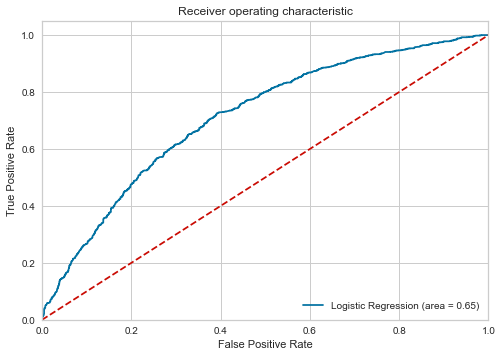

In [241]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_validation, logreg.predict(X_validation_new2))
fpr, tpr, thresholds = roc_curve(Y_validation, logreg.predict_proba(X_validation_new2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [242]:
train_df_n = train_df[['coupon', 'CoffeeHouse', 'destination', 'expiration', 'Restaurant20To50', 'weather', 'gender', 'passanger', 'Bar','direction_same','occupation','toCoupon_GEQ25min','Y']] 
validation_df_n = validation_df[['coupon', 'CoffeeHouse', 'destination', 'expiration', 'Restaurant20To50', 'weather', 'gender', 'passanger', 'Bar','direction_same','occupation','toCoupon_GEQ25min', 'Y']] 
test_df_n = test_df[['coupon', 'CoffeeHouse', 'destination', 'expiration', 'Restaurant20To50', 'weather', 'gender', 'passanger', 'Bar','direction_same','occupation','toCoupon_GEQ25min', 'Y']] 

### PyCaret model and comparison with base model 
It is a Python open source machine learning library designed to make performing standard tasks in a machine learning project easy.

It is a Python version of the Caret machine learning package in R, popular because it allows models to be evaluated, compared, and tuned on a given dataset with just a few lines of code.

In [243]:
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = train_df_n, target = 'Y', test_data= validation_df_n, preprocess=False)

,Description,Value
0,session_id,354
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6215, 13)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,12
8,Transformed Train Set,"(6215, 12)"
9,Transformed Test Set,"(2664, 12)"


In [244]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6766,0.7257,0.7925,0.6854,0.7349,0.3257,0.3316,0.2130
lr,Logistic Regression,0.6578,0.7000,0.7666,0.6740,0.7171,0.2884,0.2926,4.3920
ridge,Ridge Classifier,0.6566,0.0000,0.7663,0.6729,0.7164,0.2859,0.2901,0.0380
lda,Linear Discriminant Analysis,0.6563,0.7002,0.7652,0.6729,0.7159,0.2854,0.2895,0.0420
ada,Ada Boost Classifier,0.6537,0.6986,0.7623,0.6710,0.7136,0.2802,0.2842,0.8970
qda,Quadratic Discriminant Analysis,0.6504,0.6923,0.7345,0.6759,0.7039,0.2788,0.2804,0.0420
rf,Random Forest Classifier,0.6467,0.6831,0.7089,0.6803,0.6941,0.2762,0.2768,0.4610
nb,Naive Bayes,0.6359,0.6671,0.7385,0.6594,0.6965,0.2450,0.2477,0.0360
et,Extra Trees Classifier,0.6315,0.6628,0.6595,0.6798,0.6694,0.2535,0.2537,0.4500
knn,K Neighbors Classifier,0.6299,0.6598,0.7121,0.6607,0.6852,0.2377,0.2389,0.1620


In [245]:
gbc_classifier = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6945,0.7409,0.8210,0.6947,0.7526,0.3606,0.3693
1,0.6640,0.7101,0.7812,0.6757,0.7246,0.2995,0.3047
2,0.6640,0.7298,0.8011,0.6698,0.7296,0.2951,0.3034
3,0.7010,0.7426,0.8295,0.6986,0.7584,0.3735,0.3831
4,0.6752,0.7176,0.8125,0.6777,0.7390,0.3184,0.3277
5,0.6747,0.7133,0.7841,0.6866,0.7321,0.3228,0.3274
6,0.6779,0.7336,0.7841,0.6900,0.7340,0.3301,0.3344
7,0.6989,0.7396,0.7898,0.7110,0.7483,0.3761,0.3794
8,0.6570,0.7140,0.7550,0.6760,0.7133,0.2897,0.2924
9,0.6586,0.7156,0.7664,0.6742,0.7173,0.2909,0.2947


Checking Pycaret results on unprocessed data so as to find out the scope of improvement

In [246]:
train_df_wo_encoding1 = train_df_wo_encoding[['coupon', 'CoffeeHouse', 'destination', 'expiration', 'Restaurant20To50', 'weather', 'gender', 'passanger', 'Bar','direction_same','occupation','toCoupon_GEQ25min','Y']] 
validation_df_wo_encoding1= validation_df_wo_encoding[['coupon', 'CoffeeHouse', 'destination', 'expiration', 'Restaurant20To50', 'weather', 'gender', 'passanger', 'Bar','direction_same','occupation','toCoupon_GEQ25min','Y']] 
clf2 = setup(data = train_df_wo_encoding1, target = 'Y', test_data= validation_df_wo_encoding1, preprocess=True, fix_imbalance=True)

,Description,Value
0,session_id,2767
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6215, 13)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


In [247]:
best_model2 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6766,0.7279,0.7521,0.6994,0.7247,0.3340,0.3356,0.1930
gbc,Gradient Boosting Classifier,0.6719,0.7248,0.7331,0.7011,0.7166,0.3275,0.3282,0.4160
ridge,Ridge Classifier,0.6465,0.0000,0.6523,0.7023,0.6762,0.2881,0.2892,0.2160
lda,Linear Discriminant Analysis,0.6462,0.6984,0.6523,0.7019,0.6760,0.2874,0.2885,0.1380
lr,Logistic Regression,0.6459,0.6984,0.6504,0.7023,0.6752,0.2871,0.2883,0.1520
ada,Ada Boost Classifier,0.6444,0.6971,0.6686,0.6929,0.6803,0.2799,0.2803,0.2400
svm,SVM - Linear Kernel,0.6430,0.0000,0.6876,0.6882,0.6836,0.2721,0.2764,0.2180
rf,Random Forest Classifier,0.6412,0.6816,0.6947,0.6790,0.6865,0.2671,0.2675,0.7160
et,Extra Trees Classifier,0.6273,0.6615,0.6472,0.6791,0.6627,0.2470,0.2474,0.6260
knn,K Neighbors Classifier,0.6253,0.6567,0.6598,0.6720,0.6655,0.2395,0.2397,0.2630


####  Modelling using LGBM as given by Pycaret model as the best model


In [248]:
lgbm1 = create_model('lightgbm')
pred_holdout = predict_model(lgbm1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6865,0.7365,0.7585,0.7082,0.7325,0.3549,0.3562
1,0.6785,0.7287,0.7557,0.7000,0.7268,0.3375,0.3390
2,0.6736,0.7377,0.7841,0.6849,0.7311,0.3208,0.3256
3,0.7074,0.7646,0.7869,0.7214,0.7527,0.3961,0.3984
4,0.6720,0.7149,0.7614,0.6907,0.7243,0.3219,0.3242
5,0.6490,0.6968,0.7188,0.6801,0.6989,0.2788,0.2794
6,0.6763,0.7438,0.7500,0.7003,0.7243,0.3336,0.3347
7,0.6876,0.7116,0.7386,0.7182,0.7283,0.3610,0.3612
8,0.6651,0.7250,0.7322,0.6927,0.7119,0.3126,0.3133
9,0.6699,0.7189,0.7350,0.6973,0.7157,0.3228,0.3235


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6821,0.7301,0.7726,0.7073,0.7385,0.3351,0.3372


In [249]:
# import math
# print(-(3/5)*math.log((3/5),2)-(2/5)*math.log((2/5),2))
# print(-(2/3)*math.log((2/3),2)-(1/3)*math.log((1/3),2))

In [250]:
# sm = SMOTE(random_state=42)
# X_train_noscore, y_train_noscore = sm.fit_resample(X_train_noscore, y_train_noscore)
# y_train_noscore.value_counts()
# # specify configurations as dict
# params = {
#     'boosting_type': 'gbdt',
#     'objective': 'binary',
#     'metric': 'binary_logloss',
#     'num_boost_round':1000,
#     'num_threads':2,
#     'num_class' : 1,
#     'max_bin':200,
#     'num_leaves': 32,
#     'max_depth' : -1,
#     'learning_rate': 0.02,
#     'num_class:':1,
#     }
# gbm = lgbm.LGBMClassifier(params)
# gridParams = {
#     'boosting_type':['dart','gbdt'],
#     'metric':[
#         'binary_logloss',
#         'binary_error',
#         'auc'
#     ],
#     'num_leaves': np.array([8,16,32]),
#     'max_bin':[50,100,200,500],
#     'objective':['binary']
# #     ,'feature_fraction': [0.2, 0.4, 0.6, 0.7, 0.8]
#      ,'reg_lambda': [0.01,10.0]
#      ,'min_data_in_leaf':[0,20]
# }

# grid = GridSearchCV(gbm, gridParams, verbose=2, cv=4, n_jobs=2)
# grid.fit(train_noscore.drop(columns=['active_status']),train_noscore['active_status'])
# run.log_list('grid.best_params_',grid.best_params_)
# run.log('grid.best_score_',grid.best_score_)
# best_params = grid.best_params_
# for i in best_params:
#     print(i)
# lgb_train = lgbm.Dataset(X_train_noscore, y_train_noscore)
# lgb_eval  = lgbm.Dataset(X_test_noscore, y_test_noscore, reference=lgb_train)
# gbm = lgbm.train(best_params,
#             lgb_train,
#             num_boost_round=5000,
#             valid_sets=[lgb_train,lgb_eval],
#             valid_names=['train', 'eval'],
#             learning_rates= lambda iter: 0.008 * (0.99 ** iter),  ## change from 0
#             early_stopping_rounds=10
#                 )
# # -

# gbm.save_model(models +'full_lgbm_opr_no_score_'+'.pkl')
# model = Model.register(model_path=models +'full_lgbm_opr_no_score_'+'.pkl',
#                        model_name="full_lgbm_opr_no_score_2021",
#                        workspace=ws)

#### Using SMOTE for unbalanced data

In [251]:
# if the dataset is unbalanced i.e no. of values in each level of target variable varies a lot.Then it should be balanced. 
# For this SMOTE is used.
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm= sm.fit_resample(Xtrain_new2, Ytrain)
y_train_sm.value_counts()

1    3518
0    3518
Name: Y, dtype: int64

In [252]:
#Now LGBM model is used to train data. For this parameters are provided for LGBMClassifier function.
import lightgbm as lgbm
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_boost_round':1000,
    'num_threads':2,
    'num_leaves': 32,
    'max_depth' : -1,
    'learning_rate': 0.05,
    'num_class:':1,
    }
gbm = lgbm.LGBMClassifier(params)

In [253]:
# Before training data, Best parameters are found out using GridSearchCV from all alternatives of parameters.
from sklearn.model_selection import GridSearchCV
import lightgbm as lgbm
gbm1 = lgbm.LGBMClassifier({
    'early_stopping_rounds':100, 'bagging_fraction': 0.5, 'bagging_freq' :5,  'objective':'binary',   'num_boost_round':1000,'num_threads':4,
})
gridParams = {
    'boosting_type':['dart','gbdt'],
    'metric':[
        'binary_logloss',
        'binary_error',
        'auc'
    ],
    'num_leaves': np.array([8,16,32]),
    'learning_rate': [0.05,0.1,0.15, 0.2, 0.25] ,
    'max_depth' : [2,3,4,5] 
}
grid = GridSearchCV(gbm1, gridParams, verbose=2, cv=4, n_jobs=1)
grid.fit(X_train_sm, y_train_sm)

Fitting 4 folds for each of 360 candidates, totalling 1440 fits
[CV] boosting_type=dart, learning_rate=0.05, max_depth=2, metric=binary_logloss, num_leaves=8 
[CV]  boosting_type=dart, learning_rate=0.05, max_depth=2, metric=binary_logloss, num_leaves=8, total=   0.1s
[CV] boosting_type=dart, learning_rate=0.05, max_depth=2, metric=binary_logloss, num_leaves=8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  boosting_type=dart, learning_rate=0.05, max_depth=2, metric=binary_logloss, num_leaves=8, total=   0.1s
[CV] boosting_type=dart, learning_rate=0.05, max_depth=2, metric=binary_logloss, num_leaves=8 
[CV]  boosting_type=dart, learning_rate=0.05, max_depth=2, metric=binary_logloss, num_leaves=8, total=   0.1s
[CV] boosting_type=dart, learning_rate=0.05, max_depth=2, metric=binary_logloss, num_leaves=8 
[CV]  boosting_type=dart, learning_rate=0.05, max_depth=2, metric=binary_logloss, num_leaves=8, total=   0.1s
[CV] boosting_type=dart, learning_rate=0.05, max_depth=2, metric=binary_logloss, num_leaves=16 
[CV]  boosting_type=dart, learning_rate=0.05, max_depth=2, metric=binary_logloss, num_leaves=16, total=   0.1s
[CV] boosting_type=dart, learning_rate=0.05, max_depth=2, metric=binary_logloss, num_leaves=16 
[CV]  boosting_type=dart, learning_rate=0.05, max_depth=2, metric=binary_logloss, num_leaves=16, total=   0.1s
[CV] boosting_type=dart, learning_rate=0.05, max_depth=2, metric=b

[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  2.5min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=LGBMClassifier(boosting_type={'bagging_fraction': 0.5,
                                                     'bagging_freq': 5,
                                                     'early_stopping_rounds': 100,
                                                     'num_boost_round': 1000,
                                                     'num_threads': 4,
                                                     'objective': 'binary'},
                                      class_weight=None, colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split...
                                      subsample=1.0, subsample_for_bin=200000,
                                      su

In [254]:
#Finding best parameters
best_params = grid.best_params_
print(best_params)


{'boosting_type': 'gbdt', 'learning_rate': 0.25, 'max_depth': 5, 'metric': 'binary_logloss', 'num_leaves': 32}


In [255]:
#Using LGBM Classifier with best parameters and then training the training data
gbm = lgbm.LGBMClassifier(objective='binary',   
                        num_boost_round= 1000,
                        num_threads= 4,
                        boosting_type= 'gbdt', 
                        learning_rate= 0.25, 
                        max_depth= 5, 
                        metric= 'binary_logloss')
gbm.fit(X_train_sm, y_train_sm,
        early_stopping_rounds= 100,
        eval_set=[(X_train_sm, y_train_sm), (X_validation_new2, Y_validation)])


[1]	training's binary_logloss: 0.656072	valid_1's binary_logloss: 0.66159
[2]	training's binary_logloss: 0.633366	valid_1's binary_logloss: 0.643523
[3]	training's binary_logloss: 0.618392	valid_1's binary_logloss: 0.631835
[4]	training's binary_logloss: 0.608625	valid_1's binary_logloss: 0.625181
[5]	training's binary_logloss: 0.600986	valid_1's binary_logloss: 0.621846
[6]	training's binary_logloss: 0.59493	valid_1's binary_logloss: 0.617414
[7]	training's binary_logloss: 0.590163	valid_1's binary_logloss: 0.614986
[8]	training's binary_logloss: 0.585279	valid_1's binary_logloss: 0.612439
[9]	training's binary_logloss: 0.581421	valid_1's binary_logloss: 0.61033
[10]	training's binary_logloss: 0.578076	valid_1's binary_logloss: 0.609274
[11]	training's binary_logloss: 0.575219	valid_1's binary_logloss: 0.608132
[12]	training's binary_logloss: 0.572829	valid_1's binary_logloss: 0.60686
[13]	training's binary_logloss: 0.570054	valid_1's binary_logloss: 0.604924
[14]	training's binary_lo

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.25, max_depth=5,
               metric='binary_logloss', min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_boost_round=1000, num_leaves=31, num_threads=4,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [256]:
#Predictions using trained data on validation data and output as 1 and 0 is available
y_pred = gbm.predict(X_validation_new2)

In [257]:
#If output is needed in terms of probability
gbm.predict_proba(X_validation_new2)

array([[0.83605346, 0.16394654],
       [0.2283968 , 0.7716032 ],
       [0.38406968, 0.61593032],
       ...,
       [0.32329973, 0.67670027],
       [0.73605568, 0.26394432],
       [0.35270949, 0.64729051]])

In [258]:
from sklearn.model_selection import cross_val_score
print('Accuracy for Train Set', cross_val_score(gbm, Xtrain_new2, Ytrain, scoring='accuracy', cv=4, n_jobs=4))
print('Accuracy for Validation Set', cross_val_score(gbm, X_validation_new2, Y_validation, scoring='accuracy', cv=4, n_jobs=4))

Accuracy for Train Set [0.65186615 0.65250965 0.65637066 0.6394076 ]
Accuracy for Validation Set [0.62912913 0.63363363 0.62012012 0.61561562]


In [259]:
print('auc for Train Set', cross_val_score(gbm, Xtrain_new2, Ytrain, scoring='roc_auc', cv=4, n_jobs=4))
print('auc for Validation Set', cross_val_score(gbm, X_validation_new2, Y_validation, scoring='roc_auc', cv=4, n_jobs=4))

auc for Train Set [0.69912075 0.68847704 0.67592466 0.68130851]
auc for Validation Set [0.66581923 0.66670371 0.65199633 0.65501561]


In [260]:
cross_val_score(gbm, X_validation_new2, Y_validation, scoring='accuracy', cv=4, n_jobs=-1)

array([0.62912913, 0.63363363, 0.62012012, 0.61561562])

In [261]:
# lgb_train = lgbm.Dataset(X_train_sm, y_train_sm)
# lgb_eval  = lgbm.Dataset(X_validation_new2, Y_validation, reference=lgb_train)
# gbm = lgbm.train(best_params,
            
#             lgb_train,
#             num_boost_round=5000,
#             valid_sets=[lgb_train,lgb_eval],
#             valid_names=['train', 'eval'],
#             early_stopping_rounds=10,
#                 )

In [262]:
y_pred = gbm.predict(X_validation_new2, raw_score=False)
print(y_pred)

[0 1 1 ... 1 0 1]


### Finding Threshold using roc-auc

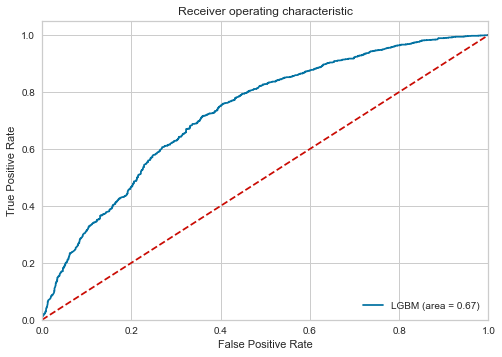

In [263]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_validation, y_pred)
fpr, tpr, thresholds = roc_curve(Y_validation, gbm.predict_proba(X_validation_new2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [264]:
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

yhat = gbm.predict_proba(Xtrain_new2)
# keep probabilities for the positive outcome only
probs = yhat[:, 1]
# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(Ytrain, to_labels(probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.316, F-Score=0.76853


In [265]:
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')


yhat = gbm.predict_proba(X_validation_new2)
# keep probabilities for the positive outcome only
probs = yhat[:, 1]
# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(Y_validation, to_labels(probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.331, F-Score=0.76343


In [266]:
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')


# keep probabilities for the positive outcome only
yhat = gbm.predict_proba(Xtrain_new2)
probs_train = yhat[:, 1]
yhat = gbm.predict_proba(X_validation_new2)
probs_val = yhat[:, 1]
# define thresholds
thresholds = [0.3]
# evaluate each threshold
score_train = [f1_score(Ytrain, to_labels(probs_train, t)) for t in thresholds]
score_val = [f1_score(Y_validation, to_labels(probs_val, t)) for t in thresholds]
# get best threshold
ix = 0
print('Threshold_train=%.3f, F-Score_train=%.5f' % (thresholds[ix], score_train[ix]))
print('Threshold_test=%.3f, F-Score_test=%.5f' % (thresholds[ix], score_val[ix]))


Threshold_train=0.300, F-Score_train=0.76761
Threshold_test=0.300, F-Score_test=0.76018


In [267]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

def MyLGBClassifier(gbm, X, Y, THRESHOLD):
    preds = np.where(gbm.predict_proba(X)[:,1] > THRESHOLD, 1, 0)
    df = pd.DataFrame(data=[accuracy_score(Y, preds), recall_score(Y, preds),
                   precision_score(Y, preds), roc_auc_score(Y, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])
    return df


In [268]:
MyLGBClassifier(gbm, X_validation_new2, Y_validation, 0.3)

,0
accuracy,0.661787
recall,0.922481
precision,0.646446
roc_auc_score,0.611330


In [269]:
MyLGBClassifier(gbm, Xtrain_new2, Ytrain, 0.3)

,0
accuracy,0.676267
recall,0.944571
precision,0.646498
roc_auc_score,0.635430


In [270]:
MyLGBClassifier(gbm, Xtest_new2, Y_test, 0.3)

,0
accuracy,0.653351
recall,0.927705
precision,0.630828
roc_auc_score,0.613461


#### Using shap values to interpret the model
The SHAP summary plot tells us the most important features and their range of effects over the dataset.

In [271]:
import shap

explainer = shap.Explainer(gbm)
shap_values = explainer.shap_values(Xtrain_new2)

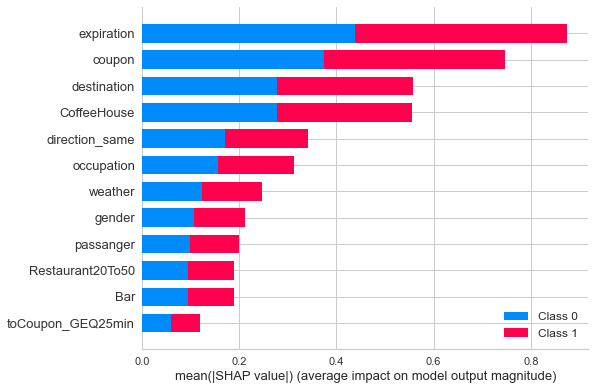

In [272]:
shap.summary_plot(shap_values, Xtrain_new2, plot_type="bar")

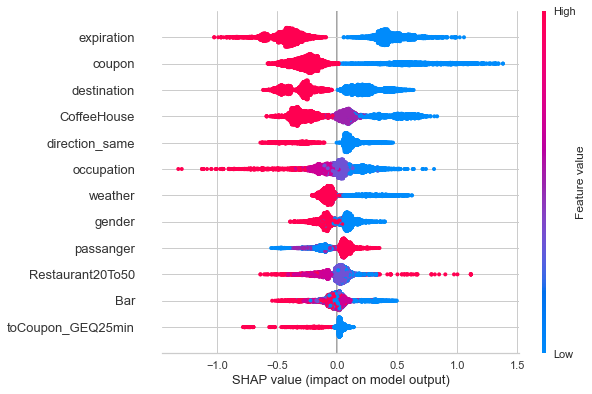

In [273]:
shap_values = explainer.shap_values(Xtrain_new2)
shap.summary_plot(shap_values[0], Xtrain_new2.values, feature_names = Xtrain_new2.columns)

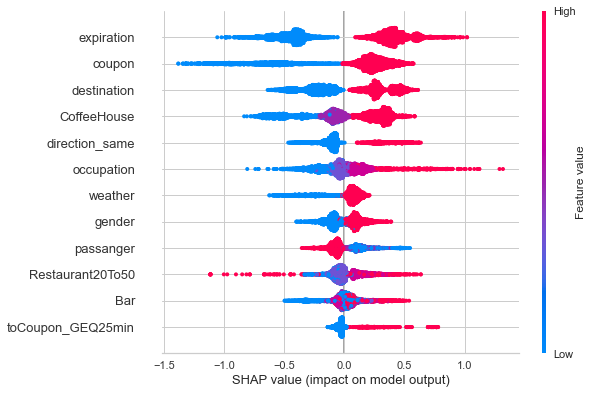

In [274]:
shap.summary_plot(shap_values[1], Xtrain_new2.values, feature_names = Xtrain_new2.columns)

Summary plot shows:
1. Expiration feature has the strongest effect on chances of acceptance. As expiration time increases, chances of acceptance increases.
2. People going to Coffee house, carry and takeaway and restaurants where average expense per month is less than $20 are more likely to accept coupon.
3. The people who had gone to coffeehouse atleast once have more chances of accepting the coupon.
4. The people who are not going to any urgent place have more chances of accepting the coupon.
5. The people who are travelling with their friend(s) are more likely to accept the coupon.
7. If restaurant/bar is in same direction in which the person is travelling, then he/she is more likely to accept the coupon.
8. If occupation is 'legal', the chances of accepting the coupon is least.
9. In Sunny weather, people are more likely to accept the coupon.
10. The person who has never gone to Bar, are least likely to accept the coupon.
11. Males are more likely to accept the coupon.
12. The people who go to restaurant very less or rarelyand have average expense is $20 to 50 have less chances of coupon acceptance.
13. For people having driving distance greater than 25 minutes it is less likely to accept the coupon. 

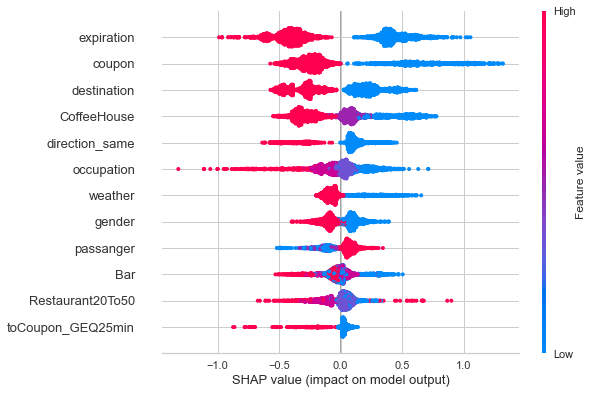

In [275]:
shap_values = explainer.shap_values(X_validation_new2)
shap.summary_plot(shap_values[0], X_validation_new2.values, feature_names = X_validation_new2.columns)

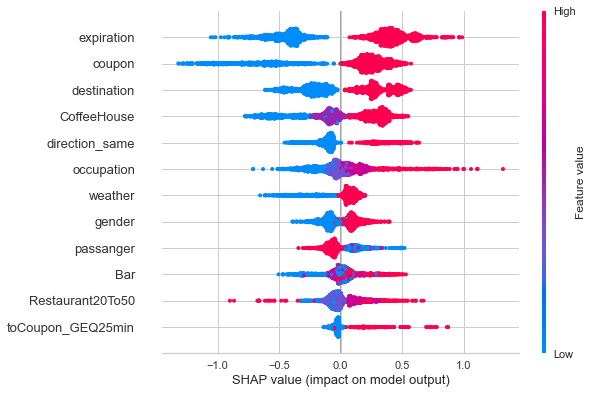

In [276]:
shap.summary_plot(shap_values[1], X_validation_new2.values, feature_names = X_validation_new2.columns)

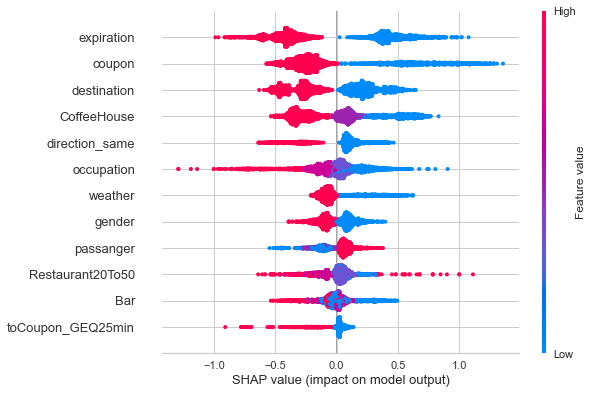

In [277]:
shap_valuesn = explainer.shap_values(Xtest_new2)
shap.summary_plot(shap_valuesn[0], Xtest_new2.values, feature_names = Xtest_new2.columns)

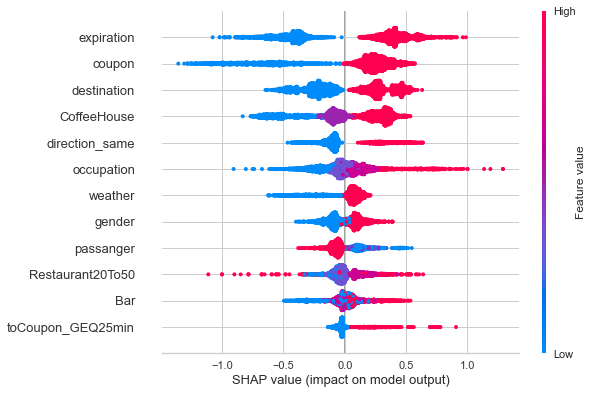

In [278]:
shap.summary_plot(shap_valuesn[1], Xtest_new2.values, feature_names = Xtest_new2.columns)